In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.use("Agg")  # noqa: E402

In [2]:
##Read in the data sets needed. X_1 and X_2 are the training feature data for
##the GPs. Y_1 are the labels for the first GP regression (area estimates), Y_2 are the
##labels for the second GP regression (distance errors)
##########################
#Read in training data X_1, X_2
file_path = 'Ped_2R_GP_Training_Data_Features_X.txt'

X_1 = np.loadtxt(file_path)
X_2 = X_1
#########################
#Read in training labels Y_1 for the Area Growth Values Ag for the 100 tests
file_path = 'Ped_2R_GP_Training_Data_Labels_Y1.txt'

Y_1 = np.loadtxt(file_path)

##########################
#Read in training labels Y_2 for the Mean Distance Errors for the 100 tests
file_path = 'Ped_2R_GP_Training_Data_Labels_Y2.txt'

# Read the data from the file
Y_2 = np.loadtxt(file_path)

#############################
#Read in test data X_Test (just a copy of the training features data for now)
file_path = 'Ped_2R_GP_Testing_Data_Features_X.txt'

X_test = np.loadtxt(file_path)
#############################
#Read in test data results Y_Test_1 for the area growth Ag
file_path = 'Ped_2R_GP_Testing_Data_Labels_Y1.txt'

Y_test_1 = np.loadtxt(file_path)
#############################
#Read in test data results Y_test_2 for the mean error
file_path = 'Ped_2R_GP_Testing_Data_Labels_Y2.txt'

Y_test_2 = np.loadtxt(file_path)

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel = C(1.0, (1e-3, 1e10)) * RBF([1.0, 1.0, 1.0, 1.0, 1.0], length_scale_bounds=(1e-2, 1e2))

# Create a Gaussian Process Regressor object
gp_1 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Train the Gaussian Process Regressor
gp_1.fit(X_1, Y_1)


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=[1, 1, 1, 1, 1]),
                         n_restarts_optimizer=10)

In [4]:
gp_1.predict(np.array([12.984, 12.527, 0.785, 1.705, 1.3359227]).reshape(1,-1))

array([2779.77582311])

In [5]:
gp_1.predict(np.array([24.787, 3.5604, 0.9948, 1.2675, 0.9890]).reshape(1,-1))

array([3739.19635569])

[2773.804467   3248.20418499 2806.41922501 2773.827408   2913.59634302
 2845.54702001 3333.22003801 3327.12205901 2773.80446701 3529.06248
 2773.80446699 4006.572096   3530.676487   3019.305505   3543.298688
 4017.763266   2773.80446703 3888.51325201 2843.52055698 2786.78680603]


/home/jlaudo/.local/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:477: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


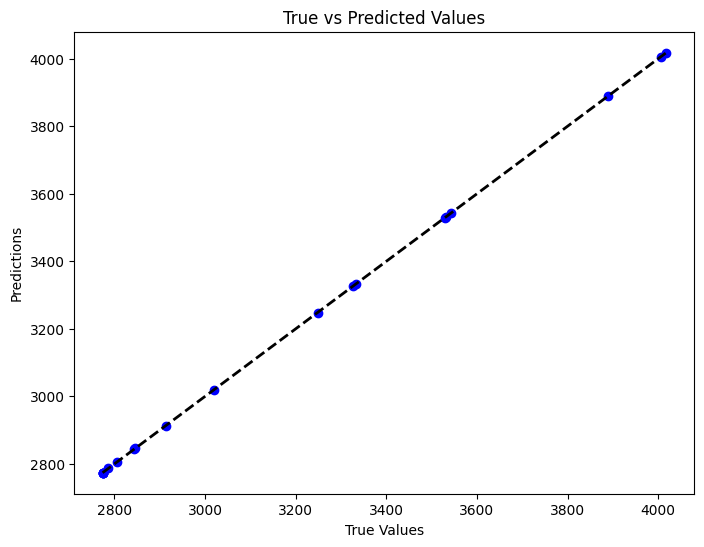

In [6]:
x_pred = X_test
#np.random.rand(100, 5)  # Generate new input data for prediction
y_pred, sigma = gp_1.predict(x_pred, return_std=True)
print(y_pred)
# Plot the results (since the output dimensionality is 1, it's difficult to visualize)
# Instead, you can plot the predicted values against the true values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test_1, y_pred, color='blue')
plt.plot([Y_test_1.min(), Y_test_1.max()], [Y_test_1.min(), Y_test_1.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

mse = mean_squared_error(Y_test_1, y_pred)

# Compute the root mean squared error
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse} mm^2")

r_squared = r2_score(Y_test_1, y_pred)

print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 1.1999800769327664e-08 mm^2
R-squared (R²): 1.0


In [8]:
# Create a Gaussian Process Regressor object
gp_2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Train the Gaussian Process Regressor
gp_2.fit(X_2, Y_2) #Train the GP on just tol, h, mu data

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=[1, 1, 1, 1, 1]),
                         n_restarts_optimizer=10)

[1.26717    1.22270001 1.29233999 1.30428    1.32827003 1.29208002
 1.17608999 1.25611997 1.30777    1.21045001 1.29671001 1.04162
 1.16428    1.29974993 1.31021998 1.04770006 1.26738999 1.13830001
 1.26484    1.24158002]


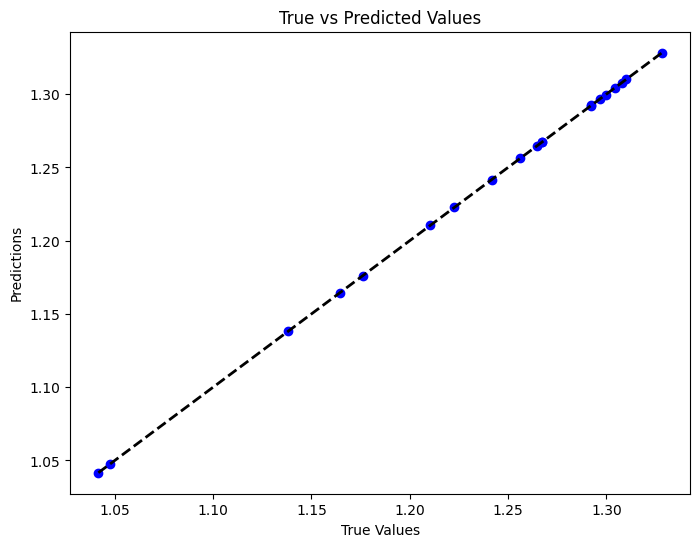

In [9]:
x_pred = X_test
#np.random.rand(100, 5)  # Generate new input data for prediction
y_pred_2, sigma = gp_2.predict(x_pred, return_std=True)
print(y_pred_2)
# Plot the results (since the output dimensionality is 1, it's difficult to visualize)
# Instead, you can plot the predicted values against the true values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test_2, y_pred_2, color='blue')
plt.plot([Y_test_2.min(), Y_test_2.max()], [Y_test_2.min(), Y_test_2.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

In [10]:
mse = mean_squared_error(Y_test_2, y_pred_2)

# Compute the root mean squared error
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse} mm")

r_squared = r2_score(Y_test_2, y_pred_2)

print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 2.4437123521502398e-08 mm
R-squared (R²): 0.9999999999999105


In [11]:
gp_2.predict(np.array([16, 4, 0.785, 1.705, 1.3359227]).reshape(1,-1))

array([1.24677774])

In [12]:
######## MINIMIZE GP2 Predictions
import numpy as np
from scipy.optimize import minimize
from sklearn.gaussian_process import GaussianProcessRegressor

# Assuming you have a trained GaussianProcessRegressor model named 'gpr'
#tol_prior = uniform(loc=12, scale=25 - 12)
#h_prior = uniform(loc=2, scale=12 - 2)
#mu_prior = uniform(loc=0.0, scale = 1.0 - 0.0)
#Theta_crit_prior = uniform(loc=0.9, scale=2.2-0.9)
#kk_prior = kk_prior
# Define the bounds for the input variables, e.g., for a 2-dimensional input
bounds = [(X_1[:, 0].min(), X_1[:, 0].max()), (X_1[:, 1].min(), X_1[:, 1].max()), (X_1[:, 2].min(), X_1[:, 2].max()), (X_1[:, 3].min(), X_1[:, 3].max()), (X_1[:, 4].min(), X_1[:, 4].max())]
print(bounds)

# Define the objective function: the negative of the predicted mean
def objective_function(x):
    # Reshape x to be 2D array as expected by the predict method
    x = np.array(x).reshape(1, -1)
    # Predict the mean and standard deviation
    mean, std = gp_2.predict(x, return_std=True)
    # We want to minimize the mean, so return the negative mean
    return mean[0]

# Generate 100 random samples within the bounds
random_samples = np.array([np.random.uniform(low=b[0], high=b[1], size=1000) for b in bounds]).T

# Evaluate the objective function for each sample
objective_values = np.array([objective_function(sample) for sample in random_samples])

# Find the index of the minimum objective value
min_index = np.argmin(objective_values)

# Get the sample with the minimum objective value
best_sample = random_samples[min_index]

# Get the minimum prediction value
min_prediction_value = gp_2.predict(best_sample.reshape(1, -1))

print("Minimum prediction value:", min_prediction_value[0])
print("Input at minimum prediction value:", best_sample)

[(np.float64(15.079), np.float64(24.937)), (np.float64(1.107), np.float64(4.485)), (np.float64(0.107), np.float64(0.996)), (np.float64(1.105), np.float64(2.198)), (np.float64(0.643331362), np.float64(1.621664088))]
Minimum prediction value: 0.9752447322397266
Input at minimum prediction value: [24.68138636  4.13775853  0.98391923  1.1828001   0.75056642]


In [13]:
gp_2.predict(np.array([24.574, 4.183, 0.711, 1.127, 0.964633505]).reshape(1, -1))

array([1.02284])

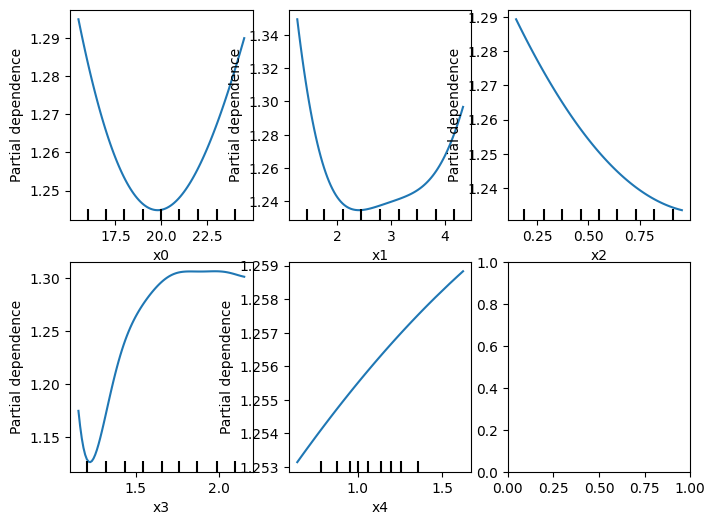

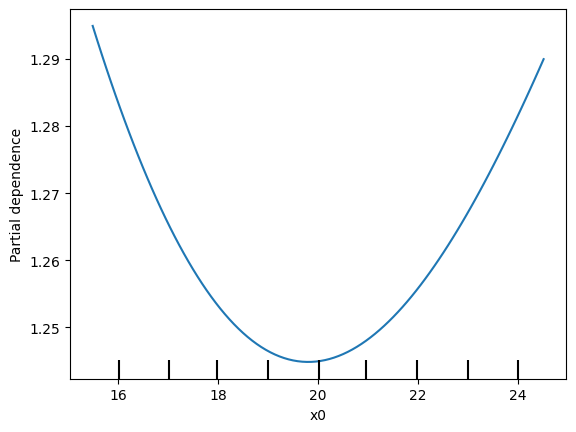

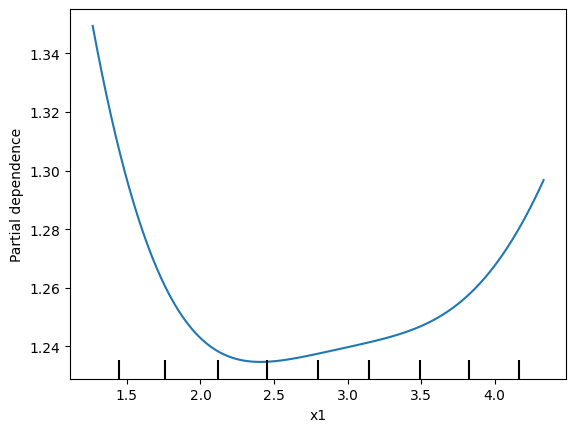

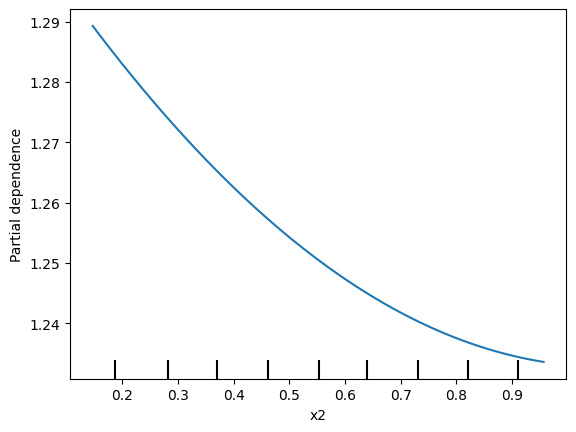

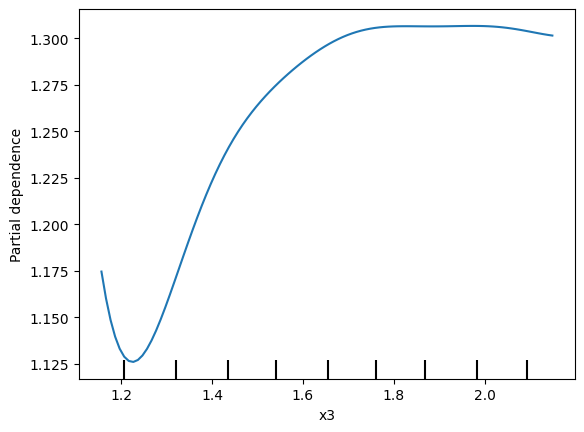

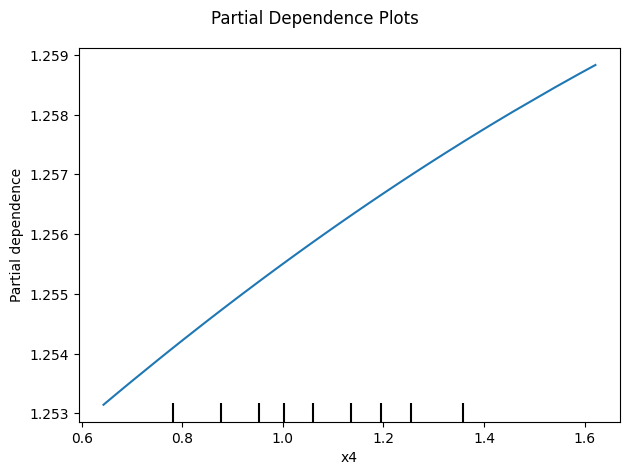

In [14]:
import sklearn.inspection
from sklearn.inspection import PartialDependenceDisplay



# Create a figure and axis objects for subplots
fig, axs = plt.subplots(2, 3, figsize=(8, 6))

x_ranges = [(10, 30), (0, 12), (0.0, 2.0), (0, 3), (0, 2)]

# Plot partial dependence for each feature
for i, ax in enumerate(axs.flat):
    if i <5:
      display = PartialDependenceDisplay.from_estimator(gp_2, X_2, features=[i])
      display.plot(ax=ax)

      # Set custom x-axis range for each subplot
      ax.set_xlim(x_ranges[i])

plt.suptitle('Partial Dependence Plots')
plt.tight_layout()
plt.show()

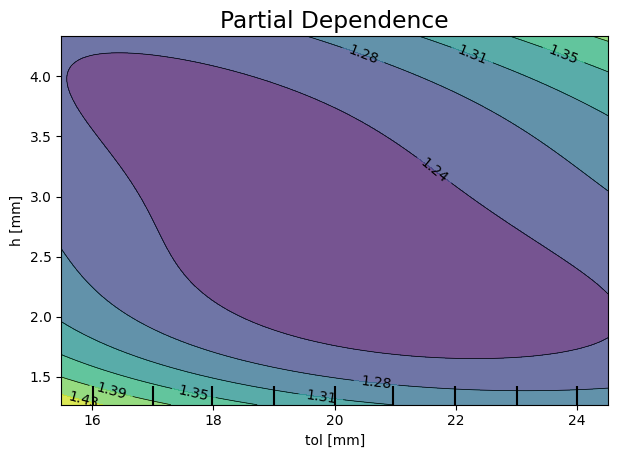

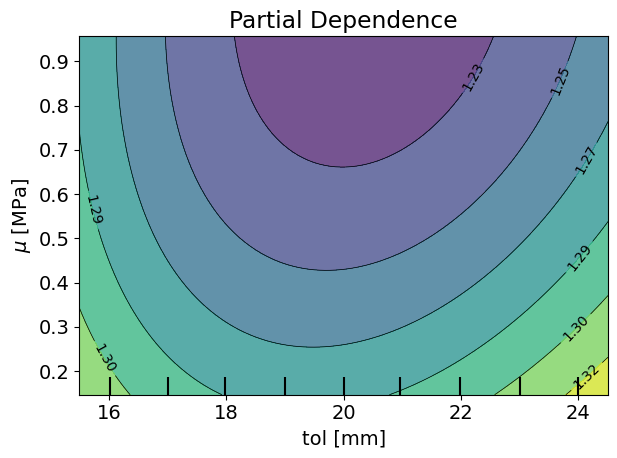

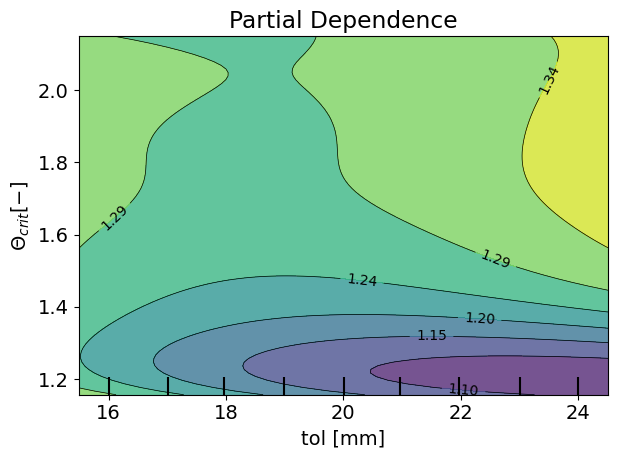

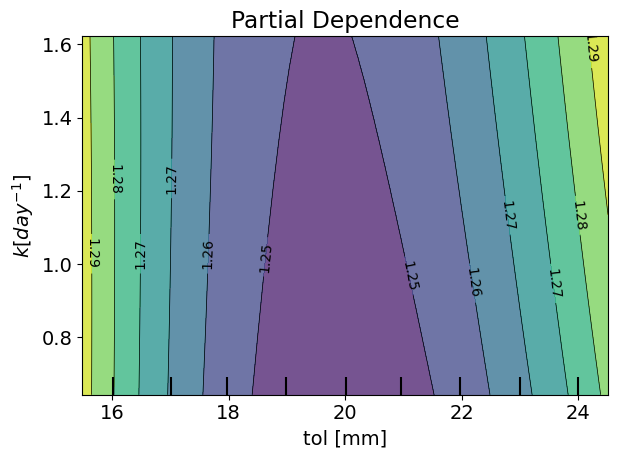

In [15]:
#####Tol Partial Dependencies Contour Plots
#Figure 1 tol and h partial dependence

PartialDependenceDisplay.from_estimator(gp_2, X_2, [(0, 1)])
plt.rc('font', size=14)
plt.xlabel('tol [mm]')
plt.ylabel('h [mm]')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()


#Figure 2 tol and mu
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(0, 2)])
plt.rc('font', size=14)
plt.xlabel('tol [mm]')
plt.ylabel('$\mu$ [MPa]')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

#Figure 3 tol and theta crit
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(0, 3)])
plt.rc('font', size=14)
plt.xlabel('tol [mm]')
plt.ylabel('$\Theta_{crit} [-]$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

#Figure 4 tol and k
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(0, 4)])
plt.rc('font', size=14)
plt.xlabel('tol [mm]')
plt.ylabel('$k [day^{-1}]$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

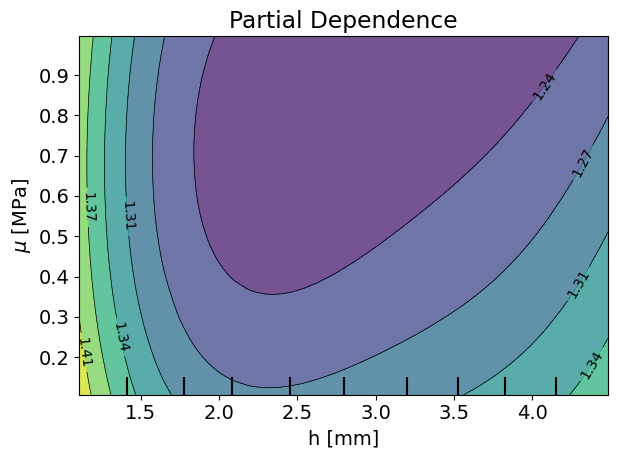

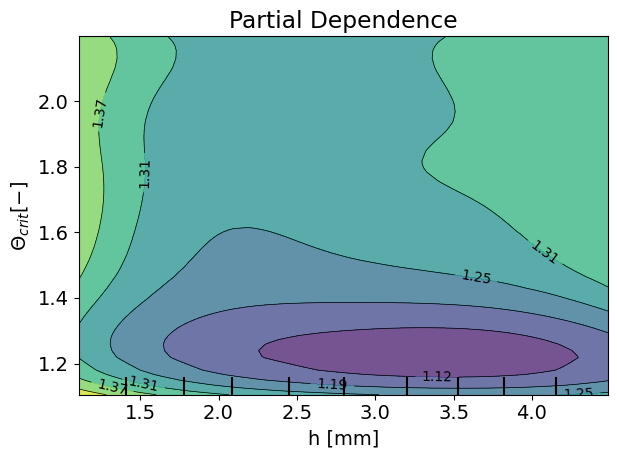

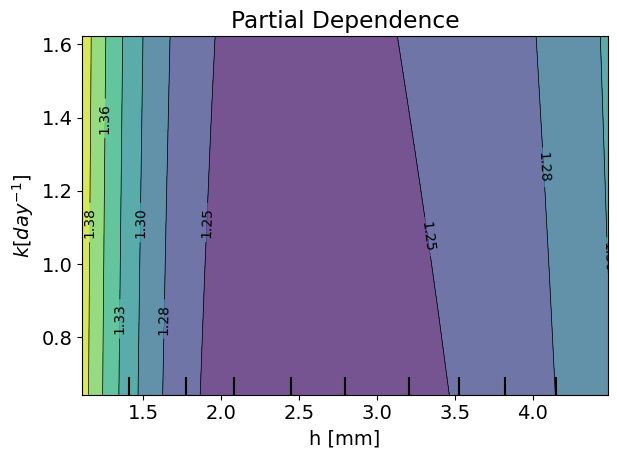

In [18]:
#####h Partial Dependencies Contour Plots
#Figure 1 tol and h partial dependence
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(1, 2)])
plt.rc('font', size=14)
plt.xlabel('h [mm]')
plt.ylabel('$\mu$ [MPa]')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()


#Figure 2 tol and mu
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(1, 3)])
plt.rc('font', size=14)
plt.xlabel('h [mm]')
plt.ylabel('$\Theta_{crit} [-]$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

#Figure 3 tol and theta crit
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(1, 4)])
plt.rc('font', size=14)
plt.xlabel('h [mm]')
plt.ylabel('$k [day^{-1}]$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

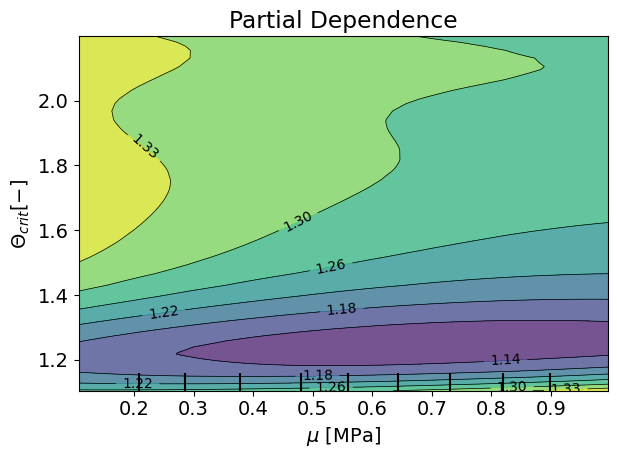

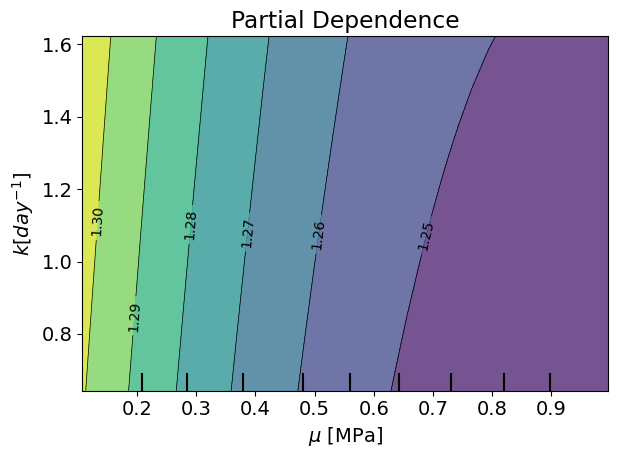

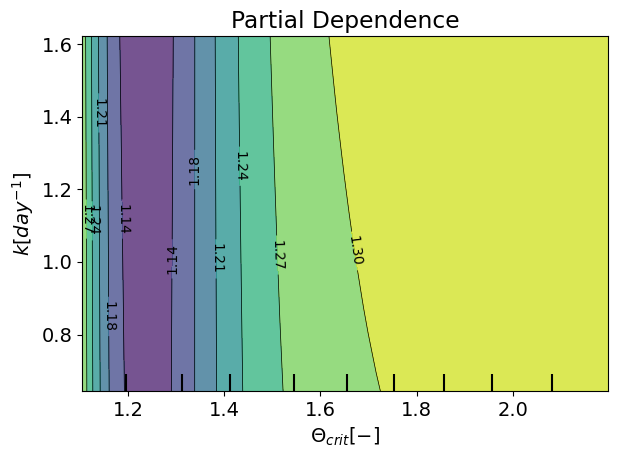

In [19]:
#Figure 2 tol and mu
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(2, 3)])
plt.rc('font', size=14)
plt.xlabel('$\mu$ [MPa]')
plt.ylabel('$\Theta_{crit} [-]$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

#Figure 3 tol and theta crit
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(2, 4)])
plt.rc('font', size=14)
plt.xlabel('$\mu$ [MPa]')
plt.ylabel('$k [day^{-1}]$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

#Figure tcrit and k
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(3, 4)])
plt.rc('font', size=14)
plt.xlabel('$\Theta_{crit} [-]$')
plt.ylabel('$k [day^{-1}]$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

In [20]:
#FUNCTION TO MAP GP OUTPUT INTO A LIKELIHOOD VALUE
def transform_gp_output(area_output, error_output):
    L_list = []
    for i, j in zip(area_output, error_output):
        sigma_1 = 52.63 #Area measurement uncertainty for area gp
        sigma_2 = 0.091858149 #Std. Dev of the error data
        err_min = 0.96280060072786 #min value of error GP on the input space
        Theta_init = 1.0
        y = 3094.992 #True Area measured
        
        err_pred = j
        y_pred = i
        
        L = (1/(sigma_1*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((y - (y_pred/Theta_init))**2)/(sigma_1**2))) * (1/(sigma_2*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((err_pred-err_min)**2)/(sigma_2**2))),   # Likelihood function with just Error Prediction        L_list.append(L)
        L_list.append(L)
        L_array = np.array(L_list)
    return L_array

1.2268669358622901
[3180.48858162 3178.99615118 3177.49768551 ... 2863.37454676 2862.27342599
 2861.1773769 ]


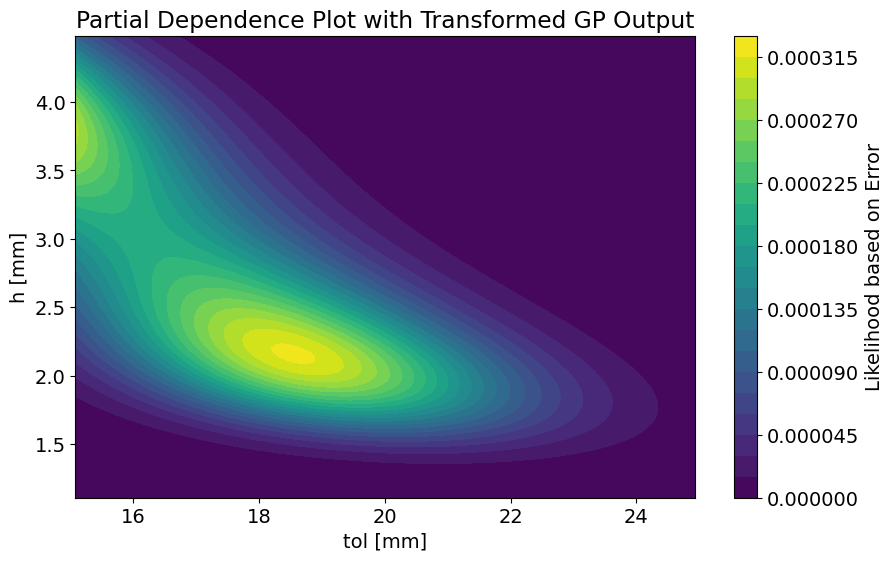

In [21]:
####TOL and H
##### Generate grid points for partial dependence
grid_size = 100

#Define Feature Ranges
feature_1_range = np.linspace(X_1[:, 0].min(), X_1[:, 0].max(), grid_size) #tol range
feature_2_range = np.linspace(X_1[:, 1].min(), X_1[:, 1].max(), grid_size) #h range
feature_3_range = np.linspace(X_1[:, 2].min(), X_1[:, 2].max(), grid_size) #mu range
feature_4_range = np.linspace(X_1[:, 3].min(), X_1[:, 3].max(), grid_size) #Theta crit range
feature_5_range = np.linspace(X_1[:, 4].min(), X_1[:, 4].max(), grid_size) #k range

#feature_4_range = np.linspace(1.2, 1.4, 500)
#feature_5_range = np.linspace(1.0, 2, 500)
#Define Grid Values for Feature 1
feature_1_grid, feature_2_grid = np.meshgrid(feature_2_range, feature_1_range)
# Fix the other features at their mean values
fixed_features = X_1.mean(axis=0)

# Create the grid for prediction
grid = np.array([
    [f1, f2, fixed_features[2], fixed_features[3], fixed_features[4]]
    for f1 in feature_1_range for f2 in feature_2_range
])

# Predict using the GP model
err_predictions = gp_2.predict(grid)
area_predictions = gp_1.predict(grid)

print(min(err_predictions))
print(area_predictions)

# Apply the transformation to the predictions
transformed_predictions = transform_gp_output(area_predictions, err_predictions)

# Reshape the transformed predictions to match the grid
transformed_predictions_grid = transformed_predictions.reshape(grid_size, grid_size)

# Plot the partial dependence plot
plt.figure(figsize=(10, 6))
plt.contourf(feature_2_grid, feature_1_grid, transformed_predictions_grid, levels=25, cmap='viridis')
plt.colorbar(label='Likelihood based on Error')
plt.xlabel('tol [mm]')
plt.ylabel('h [mm]')
plt.title('Partial Dependence Plot with Transformed GP Output')
plt.show()

1.0473493024163645
2770.2706464054063


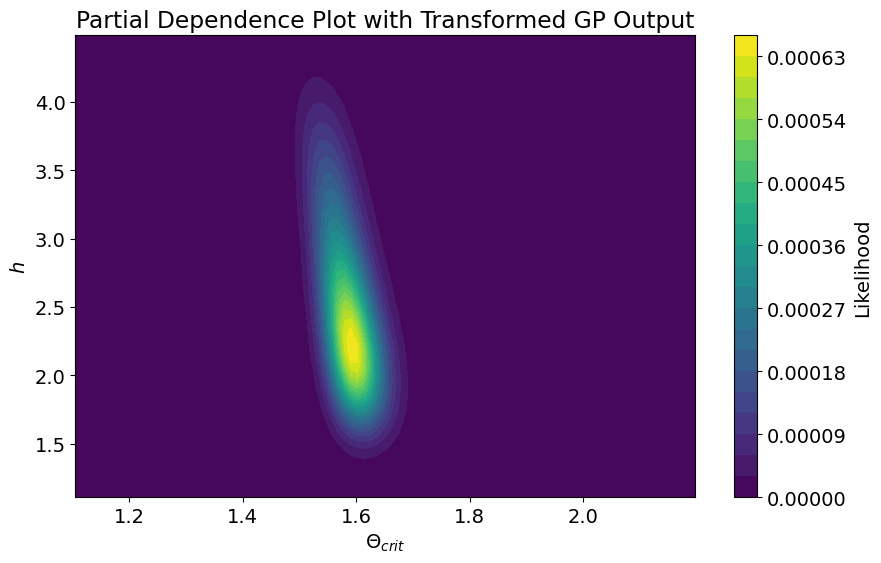

In [22]:
##h and Theta_crit
##### Generate grid points for partial dependence
grid_size = 100

#Define Feature Ranges
feature_1_range = np.linspace(X_1[:, 0].min(), X_1[:, 0].max(), grid_size) #tol range
feature_2_range = np.linspace(X_1[:, 1].min(), X_1[:, 1].max(), grid_size) #h range
feature_3_range = np.linspace(X_1[:, 2].min(), X_1[:, 2].max(), grid_size) #mu range
feature_4_range = np.linspace(X_1[:, 3].min(), X_1[:, 3].max(), grid_size) #Theta crit range
feature_5_range = np.linspace(X_1[:, 4].min(), X_1[:, 4].max(), grid_size) #k range

#Define Grid Values for Feature 1
feature_2_grid, feature_4_grid = np.meshgrid(feature_4_range, feature_2_range)
# Fix the other features at their mean values
fixed_features = X_1.mean(axis=0)

# Create the grid for prediction
grid = np.array([
    [fixed_features[0], f2, fixed_features[2], f4, fixed_features[4]]
    for f2 in feature_2_range for f4 in feature_4_range
])

# Predict using the GP model
err_predictions = gp_2.predict(grid)
area_predictions = gp_1.predict(grid)

print(min(err_predictions))
print(min(area_predictions))

# Apply the transformation to the predictions
transformed_predictions = transform_gp_output(area_predictions, err_predictions)

# Reshape the transformed predictions to match the grid
transformed_predictions_grid = transformed_predictions.reshape(grid_size, grid_size)

# Plot the partial dependence plot
plt.figure(figsize=(10, 6))
plt.contourf(feature_2_grid, feature_4_grid, transformed_predictions_grid, levels=25, cmap='viridis')
plt.colorbar(label='Likelihood')
plt.xlabel('$\Theta_{{crit}}$')
plt.ylabel('$h$')
plt.title('Partial Dependence Plot with Transformed GP Output')
plt.show()

1.0475283593773383
1413.4463994478429


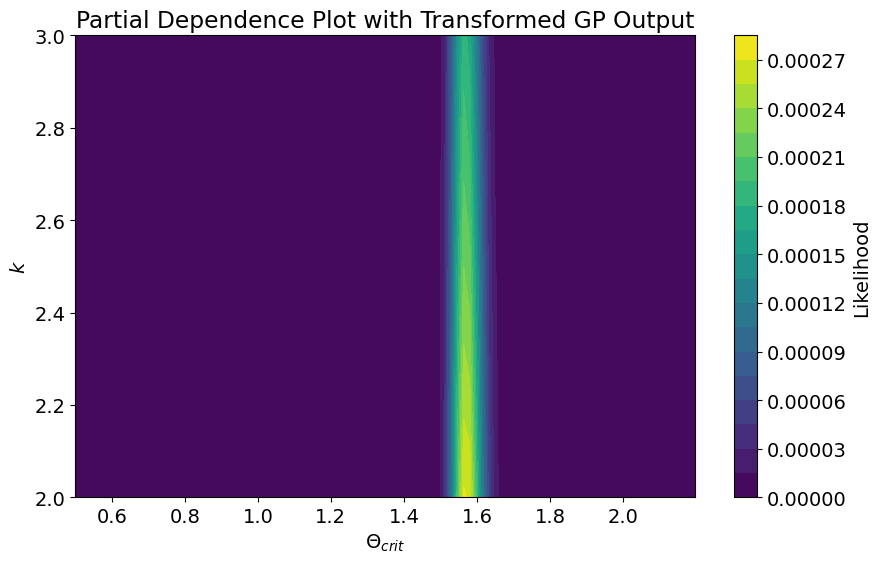

In [23]:
##k and Theta_crit
##### Generate grid points for partial dependence
grid_size = 100

#Define Feature Ranges
feature_1_range = np.linspace(X_1[:, 0].min(), X_1[:, 0].max(), grid_size) #tol range
feature_2_range = np.linspace(X_1[:, 1].min(), X_1[:, 1].max(), grid_size) #h range
feature_3_range = np.linspace(X_1[:, 2].min(), X_1[:, 2].max(), grid_size) #mu range
feature_4_range = np.linspace(0.5, X_1[:, 3].max(), grid_size) #Theta crit range
feature_5_range = np.linspace(2.0, 3, grid_size) #k range

#Define Grid Values for Feature 1
feature_5_grid, feature_4_grid = np.meshgrid(feature_4_range, feature_5_range)
# Fix the other features at their mean values
fixed_features = X_1.mean(axis=0)

# Create the grid for prediction
grid = np.array([
    [fixed_features[0], fixed_features[1], fixed_features[2], f4, f5]
    for f5 in feature_5_range for f4 in feature_4_range
])

# Predict using the GP model
err_predictions = gp_2.predict(grid)
area_predictions = gp_1.predict(grid)

print(min(err_predictions))
print(min(area_predictions))

# Apply the transformation to the predictions
transformed_predictions = transform_gp_output(area_predictions, err_predictions)

# Reshape the transformed predictions to match the grid
transformed_predictions_grid = transformed_predictions.reshape(grid_size, grid_size)

# Plot the partial dependence plot
plt.figure(figsize=(10, 6))
plt.contourf(feature_5_grid, feature_4_grid, transformed_predictions_grid, levels=25, cmap='viridis')
plt.colorbar(label='Likelihood')
plt.xlabel('$\Theta_{{crit}}$')
plt.ylabel('$k$')
plt.title('Partial Dependence Plot with Transformed GP Output')
plt.show()

In [13]:
pip install emcee

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.mixture import GaussianMixture
class CustomGMM:
    def __init__(self, n_components=1, **kwargs):
        self.gmm = GaussianMixture(n_components=n_components, **kwargs)

    def fit(self, X):
        self.gmm.fit(X)

    def pdf(self, X):

        return np.exp(self.gmm.score_samples(np.array(X).reshape(-1, 1)))

##This class is a Gaussian Mixture model with special methods to truncate pdf evaluations outside of set bounds to zero
class BoundedGMM:
    def __init__(self, gmm, bounds):
        self.gmm = gmm
        self.bounds = bounds

    def score_samples(self, X):
        # Check if samples are within bounds
        in_bounds = ((X >= self.bounds[0]) & (X <= self.bounds[1]))
        
        # Compute the log likelihood
        log_prob = self.gmm.score_samples(np.array(X).reshape(-1,1))
        
        # Set log probability to negative infinity for out-of-bounds samples
        log_prob[~in_bounds] = -np.inf
        
        return log_prob

    def pdf(self, X):
        # Convert log probability to probability
        return np.exp(self.score_samples(X))





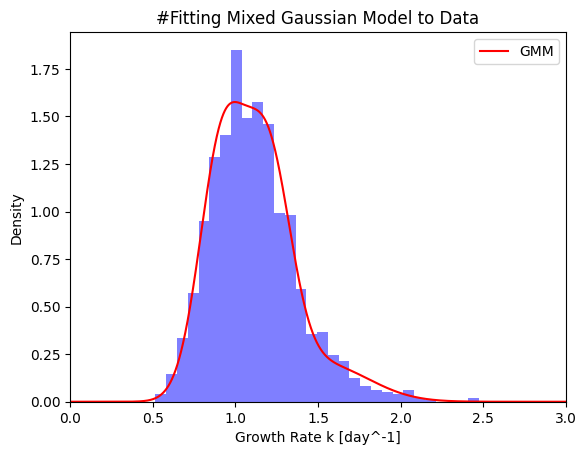

In [15]:
## Fit a Gaussian Mixture to Tina's Distribution
from sklearn.mixture import GaussianMixture
from IPython.display import display
%matplotlib inline

with open("Tina_kk_distribution_day_inverse.txt", 'r') as file:
   lines = file.readlines()

data = []
for line in lines:
    # Assuming each line contains one data point
    data_point = float(line.strip())  # Convert string to float
    data.append(data_point)

# Convert the list to a NumPy array if needed
import numpy as np
data_array = np.array(data)

gmm_data = data_array.reshape(-1,1)

# Fit a Gaussian Mixture Model
gmm = CustomGMM(n_components=3, random_state=42)
gmm.fit(gmm_data)


#Fit a second GMM without using the custom class fix to sample from it directly
gmm_2 = GaussianMixture(n_components=3, random_state=42)
gmm_2.fit(gmm_data)

#Fit a third GMM using the bounded GMM class to truncate MCMC samples outside of the data range
bounds = np.array([0.48, 1.621664088])  # Bounds for each feature (dimension)
bounded_gmm = BoundedGMM(gmm_2, bounds)

# Generate data points for plotting
x = np.linspace(0, 300, 1000000)
# Compute the log-density of the Gaussian mixture model at each point
density = gmm.pdf(x)

# Plot the data and the fitted Gaussian mixture model
plt.hist(data, bins=30, density=True, alpha=0.5, color='blue')

plt.plot(x, density, color='red', label='GMM')
plt.xlim([0,3])
plt.xlabel('Growth Rate k [day^-1]')
plt.ylabel('Density')
plt.title('#Fitting Mixed Gaussian Model to Data')
plt.legend()
plt.show()
plt.show()

kk_prior = bounded_gmm #Set the prior for k as bounded to eliminate probability issues

In [16]:
print(bounded_gmm.pdf(0.47))

[0.]


In [17]:
starting_k_samples, __ = gmm_2.sample(100)
starting_k_samples = starting_k_samples.flatten().tolist()
print(starting_k_samples)

[1.0414512090547774, 1.240198310142626, 1.2346613134843216, 1.3362688992600507, 1.1152116300459491, 1.1229499620380325, 1.116530973775706, 1.0675377527451695, 0.8329963016007658, 1.3279141942156607, 1.3093109963352076, 0.9842216874372204, 1.13644122645437, 1.092774001748936, 1.0982001696802368, 0.8986898314411779, 1.1084611422532795, 1.2789283987215678, 1.5514335978929537, 1.250662365705407, 1.2128774662396409, 1.1243021126158321, 1.1125201881714495, 1.3275072130495946, 1.2363271966558655, 1.1076159177531328, 1.0539984797912147, 1.1734311306166048, 1.1217721616109877, 1.1951323827645612, 1.1640277445215923, 1.2499839239687025, 1.0201650873675947, 1.3475867031357451, 1.581830141379779, 1.361706348000188, 1.2262708571701837, 1.318383905108198, 1.0557302251813332, 0.9759680221916192, 1.7487413927870357, 1.39411566826089, 1.1755468145739316, 1.3015424530400526, 1.2339713513944666, 1.575929333544035, 1.69695287787266, 1.779571605094898, 1.781351400003129, 1.7436855784241763, 1.4835872020022

(0.0, 3.0)

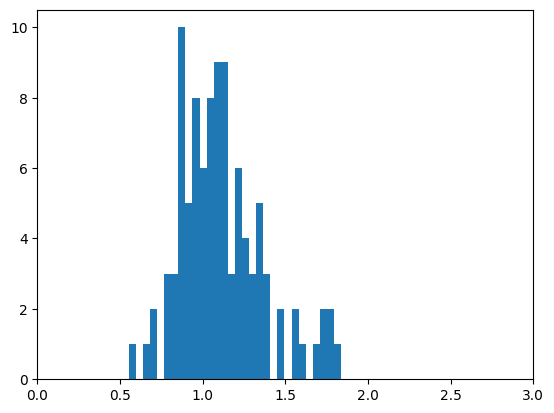

In [18]:
#Encodes the starting sample information for the walkers that sample on the k prior
plt.figure()
plt.hist(starting_k_samples, bins=30)
plt.xlim([0,3])

In [19]:
print(np.random.uniform(1.1, 1.3, 100))

[1.1596109  1.14462954 1.22399238 1.24692643 1.13473997 1.11590469
 1.14377472 1.13946965 1.27607229 1.17690793 1.20578049 1.21026936
 1.10532453 1.26449356 1.12922136 1.16219677 1.18715642 1.16162546
 1.15169334 1.10376941 1.19810107 1.26295067 1.23588531 1.23782035
 1.12926986 1.19369833 1.20659332 1.16076821 1.17008506 1.11134417
 1.10007802 1.18198983 1.28296329 1.28499518 1.22750051 1.12502438
 1.17779907 1.11044546 1.21937561 1.2005147  1.26205266 1.110657
 1.16533143 1.16077681 1.1152374  1.29427627 1.28149299 1.24791906
 1.23363173 1.23347462 1.12207318 1.17571253 1.29530774 1.13751798
 1.18770709 1.27672082 1.22362609 1.21595371 1.24229528 1.22672023
 1.23025347 1.25523275 1.16675711 1.18988965 1.14623019 1.19272504
 1.16380212 1.19302432 1.11670967 1.1906987  1.28721504 1.21204974
 1.27033043 1.22416945 1.2099699  1.11230273 1.20370269 1.11449373
 1.14320331 1.14859541 1.16241156 1.26605584 1.23414926 1.29160986
 1.26556011 1.1826263  1.10404769 1.22789979 1.29355884 1.180335

In [20]:
hyperparameters = gp_1.kernel_.get_params()

# Print the length scale
print(hyperparameters)

hyperparameters_2 = gp_2.kernel_.get_params()

print(hyperparameters_2)

{'k1': 2.74e+03**2, 'k2': RBF(length_scale=[59.6, 23.6, 1.52, 0.439, 4.65]), 'k1__constant_value': np.float64(7507876.135576082), 'k1__constant_value_bounds': (0.001, 10000000000.0), 'k2__length_scale': array([59.61580672, 23.56316684,  1.51825397,  0.43932403,  4.64611525]), 'k2__length_scale_bounds': (0.01, 100.0)}
{'k1': 1.41**2, 'k2': RBF(length_scale=[21, 2.29, 4.17, 0.312, 20.8]), 'k1__constant_value': np.float64(1.9826510395402837), 'k1__constant_value_bounds': (0.001, 10000000000.0), 'k2__length_scale': array([21.0476791 ,  2.29436722,  4.1747811 ,  0.3122801 , 20.80481365]), 'k2__length_scale_bounds': (0.01, 100.0)}


In [21]:
gp_1._get_param_names()

['alpha',
 'copy_X_train',
 'kernel',
 'n_restarts_optimizer',
 'n_targets',
 'normalize_y',
 'optimizer',
 'random_state']

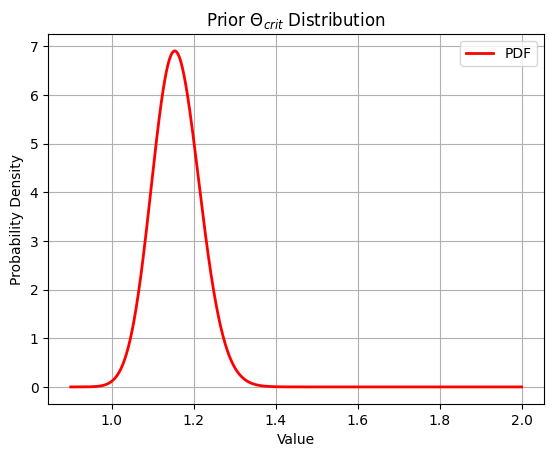

In [22]:
from scipy.stats import lognorm

# Define parameters for the log-normal distribution
mean = 1.1567  # Mean of the distribution
sigma = 0.05  # Standard deviation of the logarithm of the distribution

# Create a log-normal distribution object
Theta_crit_prior = lognorm(s=sigma, scale=mean)
x = np.linspace(0.9, 2, 1000)
pdf = Theta_crit_prior.pdf(x)
plt.plot(x, pdf, 'r-', lw=2, label='PDF')

plt.title('Prior $\Theta_{{crit}}$ Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
#code to fix how the gmm pdf evaluates probability densities
def extract_first_item(obj):
    if isinstance(obj, np.ndarray) and obj.size > 0:
        return obj[0]
    else:
        return obj

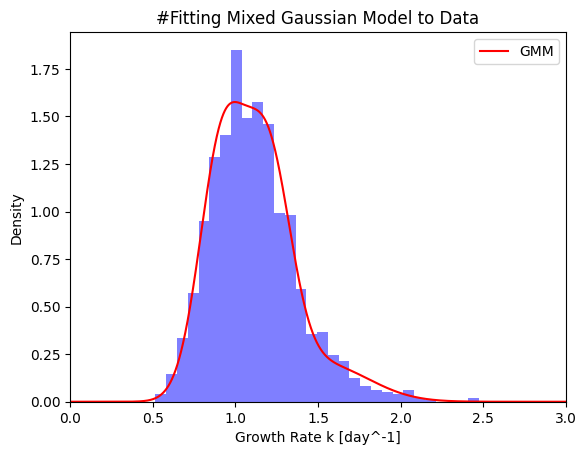

In [24]:
## Fit a Gaussian Mixture to Tina's Distribution
from sklearn.mixture import GaussianMixture
from IPython.display import display
%matplotlib inline

with open("Tina_kk_distribution_day_inverse.txt", 'r') as file:
   lines = file.readlines()

data = []
for line in lines:
    # Assuming each line contains one data point
    data_point = float(line.strip())  # Convert string to float
    data.append(data_point)

# Convert the list to a NumPy array if needed
import numpy as np
data_array = np.array(data)

gmm_data = data_array.reshape(-1,1)

# Fit a Gaussian Mixture Model
gmm = CustomGMM(n_components=3, random_state=42)
gmm.fit(gmm_data)


#Fit a second GMM without using the custom class fix to sample from it directly
gmm_2 = GaussianMixture(n_components=3, random_state=42)
gmm_2.fit(gmm_data)

#Fit a third GMM using the bounded GMM class to truncate MCMC samples outside of the data range
bounds = np.array([0.48, 1.621664088])  # Bounds for each feature (dimension)
bounded_gmm = BoundedGMM(gmm_2, bounds)

# Generate data points for plotting
x = np.linspace(0, 300, 1000000)
# Compute the log-density of the Gaussian mixture model at each point
density = gmm.pdf(x)

# Plot the data and the fitted Gaussian mixture model
plt.hist(data, bins=30, density=True, alpha=0.5, color='blue')

plt.plot(x, density, color='red', label='GMM')
plt.xlim([0,3])
plt.xlabel('Growth Rate k [day^-1]')
plt.ylabel('Density')
plt.title('#Fitting Mixed Gaussian Model to Data')
plt.legend()
plt.show()
plt.show()

kk_prior = gmm #Set the prior for k as bounded to eliminate probability issues

In [25]:

import warnings
import numpy as np
import emcee
import corner

# Filter out runtime warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
# Function to compute likelihood
def likelihood(X, y, f, theta_init_hat):
    sigma_1 = 127.55 #Area measurement uncertainty for area gp (1 cm^2)
    sigma_2 = 0.084759289/4 #Std. Dev of the data
    err_min = 0.96280060072786 #min value of error GP on the input space

    theta_init = 1 + (X[3] - 1) * theta_init_hat
    
    y_pred, err_pred = f(X)  # Predicted output from the function f
    
    # Assuming Gaussian likelihood
    likelihood = (1/(sigma_1*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((y_pred/theta_init - y)**2)/(sigma_1**2))) * (1/(sigma_2*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((err_pred-err_min)**2)/(sigma_2**2))),   # Likelihood function with just Error Prediction

    return likelihood

# Function to compute log posterior
def log_posterior(X, y, f, theta_init_hat):
    # Prior probabilities for each input variable in X

    prior_probs = [extract_first_item(prior.pdf(x)) for prior, x in zip(prior_distributions, X)]

    # Compute the likelihood
    likelihood_val = likelihood(X[:-1], y, f, X[-1])
    # Compute the log posterior
    log_posterior_val = np.sum(np.log(prior_probs)) + np.log(likelihood_val)

    return log_posterior_val

# Define your function f that maps inputs X to output y
def f(X):

    y_pred = gp_1.predict(X.reshape(1, -1))
    err_pred = gp_2.predict(X.reshape(1, -1))
    return y_pred, err_pred

from scipy.stats import uniform
from scipy.stats import norm



tol_prior = uniform(loc=16, scale=24 - 16)
h_prior = uniform(loc=1.3, scale=4.2 - 1.3)
mu_prior = uniform(loc=0.2, scale = 0.9 - 0.2)
Theta_crit_prior = uniform(loc=1.1, scale=2.1 - 1.1)
kk_prior = kk_prior
Theta_init_hat_prior = uniform(loc=0.0, scale=1.0 - 0.0)

prior_distributions = [tol_prior, h_prior, mu_prior, Theta_crit_prior, kk_prior, Theta_init_hat_prior]

# Define the measured output y
y_observed = 2827.281 # measured area growth value

# Initialize MCMC sampler
nwalkers = 100  # Number of walkers
ndim = 6  # Dimensionality of the parameter space
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(y_observed, f, prior_distributions))

# Run MCMC sampling
nsteps = 25000  # Number of MCMC steps
# Generate random numbers for each column
column1 = np.random.uniform(16, 24, 100)
column2 = np.random.uniform(1.3, 4.2, 100)
column3 = np.random.uniform(0.2, 0.9, 100)
column4 = np.random.uniform(1.1, 2.1, 100)
column5 = np.random.uniform(1.0, 1.5, 100)
column6 = np.random.uniform(0.0, 1.0, 100)
# Stack the columns horizontally to create the array

array = np.column_stack((column1, column2, column3, column4, column5, column6))

# Repeat the vector 100 times
initial_positions = array # Initial positions for walkers
step_count = 0

while step_count < nsteps:
    # Run MCMC for a subset of steps
    sampler.run_mcmc(initial_positions, nsteps=1000)


    # Increment step count
    step_count += 1000

    # You can perform any desired operations or monitoring here
    # Example: Print the current step count every 100 steps
    print(f"Completed {step_count} steps out of {nsteps}")

#Define a sample thinning factor
thin_factor = 10

# Extract samples from the sampler
samples = sampler.chain[:, 2000::thin_factor, :].reshape((-1, ndim))



##########Compute the MAP estimate
log_posterior_values = []
# Calculate the log-posterior for each multivariate sample
for i in range(len(samples)):
    log_posterior_value = log_posterior(samples[i, :], y_observed, f, samples[i, 5])
    log_posterior_values.append(log_posterior_value)
    
# Find the index of the sample with the maximum log-posterior value
map_index = np.argmax(log_posterior_values)

# The MAP estimate is the sample with the highest log-posterior
map_estimate = samples[map_index]

print("MAP estimate:", map_estimate)

Completed 1000 steps out of 25000
Completed 2000 steps out of 25000
Completed 3000 steps out of 25000
Completed 4000 steps out of 25000
Completed 5000 steps out of 25000
Completed 6000 steps out of 25000
Completed 7000 steps out of 25000
Completed 8000 steps out of 25000
Completed 9000 steps out of 25000
Completed 10000 steps out of 25000
Completed 11000 steps out of 25000
Completed 12000 steps out of 25000
Completed 13000 steps out of 25000
Completed 14000 steps out of 25000
Completed 15000 steps out of 25000
Completed 16000 steps out of 25000
Completed 17000 steps out of 25000
Completed 18000 steps out of 25000
Completed 19000 steps out of 25000
Completed 20000 steps out of 25000
Completed 21000 steps out of 25000
Completed 22000 steps out of 25000
Completed 23000 steps out of 25000
Completed 24000 steps out of 25000
Completed 25000 steps out of 25000
MAP estimate: [23.98431229  3.349019    0.89644018  1.25410699  0.94801246  0.9997371 ]


In [32]:


print("MAP estimate:", map_estimate)

MAP estimate: [23.84769302  3.51853636  0.89804956  1.25084221  0.86982827  0.99487555]


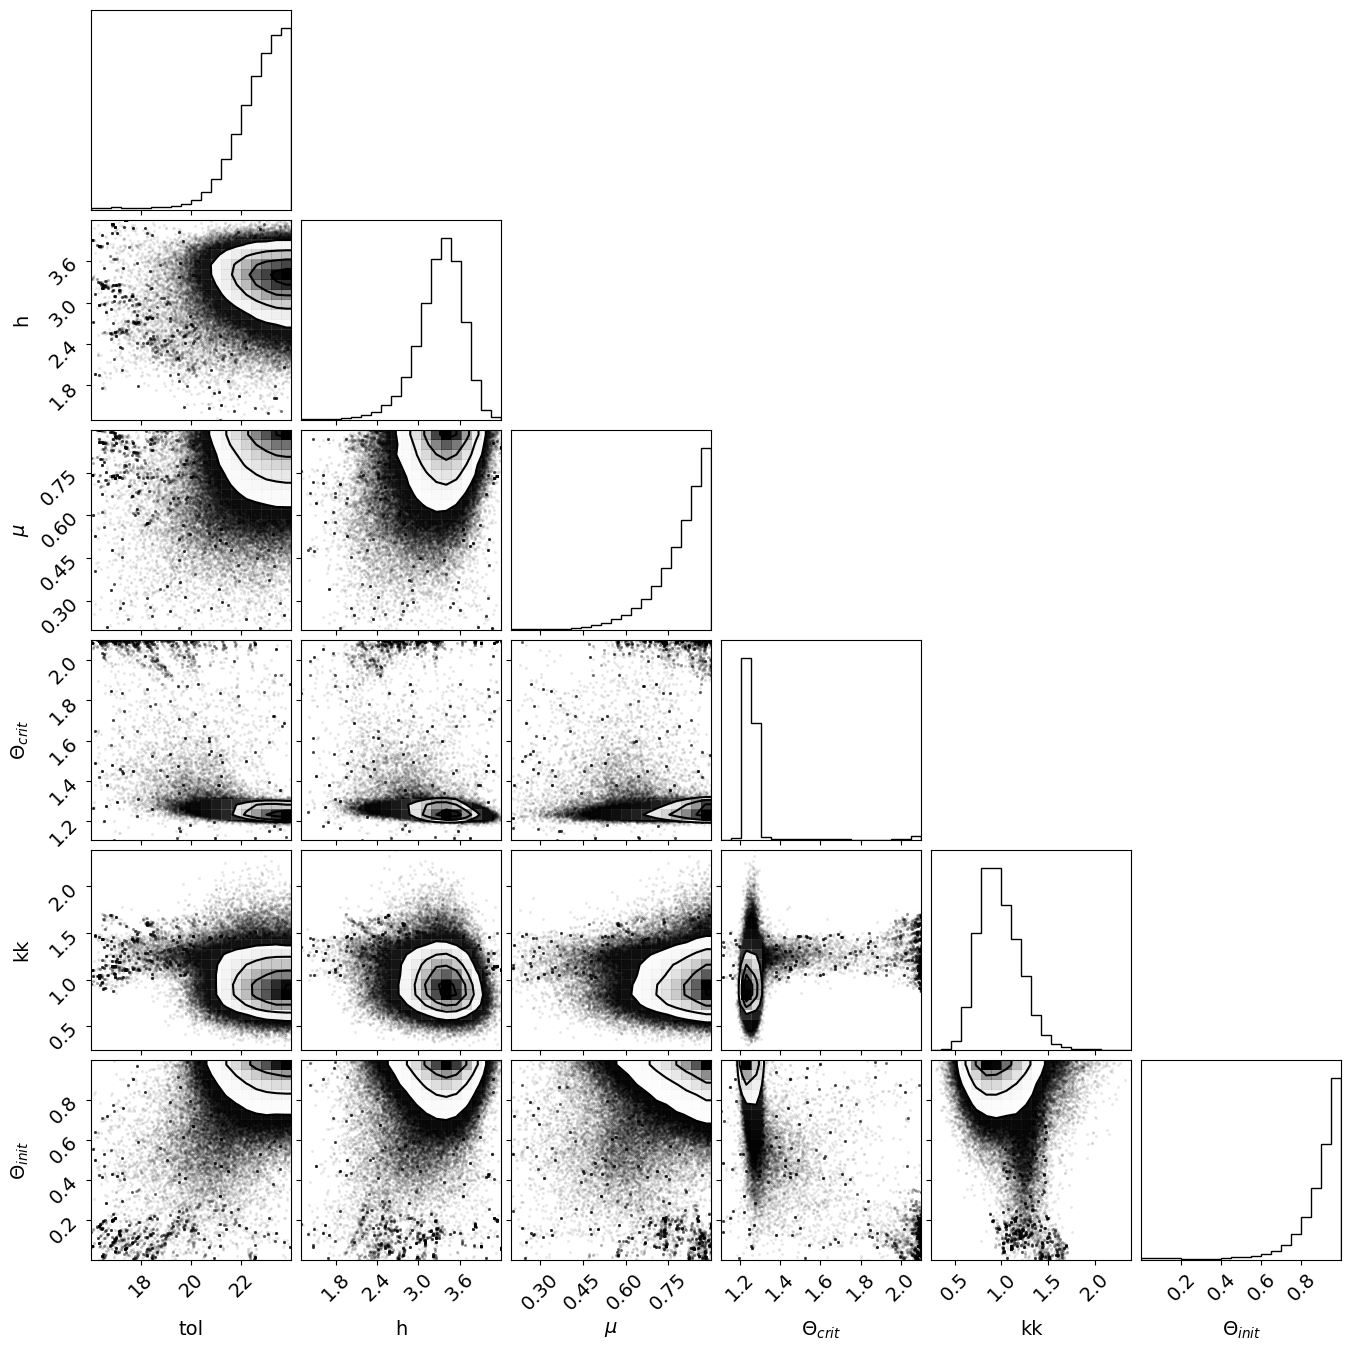

In [30]:
ranges = [(None, None), (None, None), (None, None), (None, None), (0.5, 3.0), (None, None)]
# Create a pair plot
fig = corner.corner(samples, labels=["tol", "h", "$\mu$", "$\Theta_{{crit}}$", "kk", "$\Theta_{{init}}$"],
                    truths=[None, None, None, None, None, None])

# Show the plot
plt.show()

In [32]:
print(np.median(samples[:,3]))

1.2541246681057125


In [102]:
pip install arviz

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


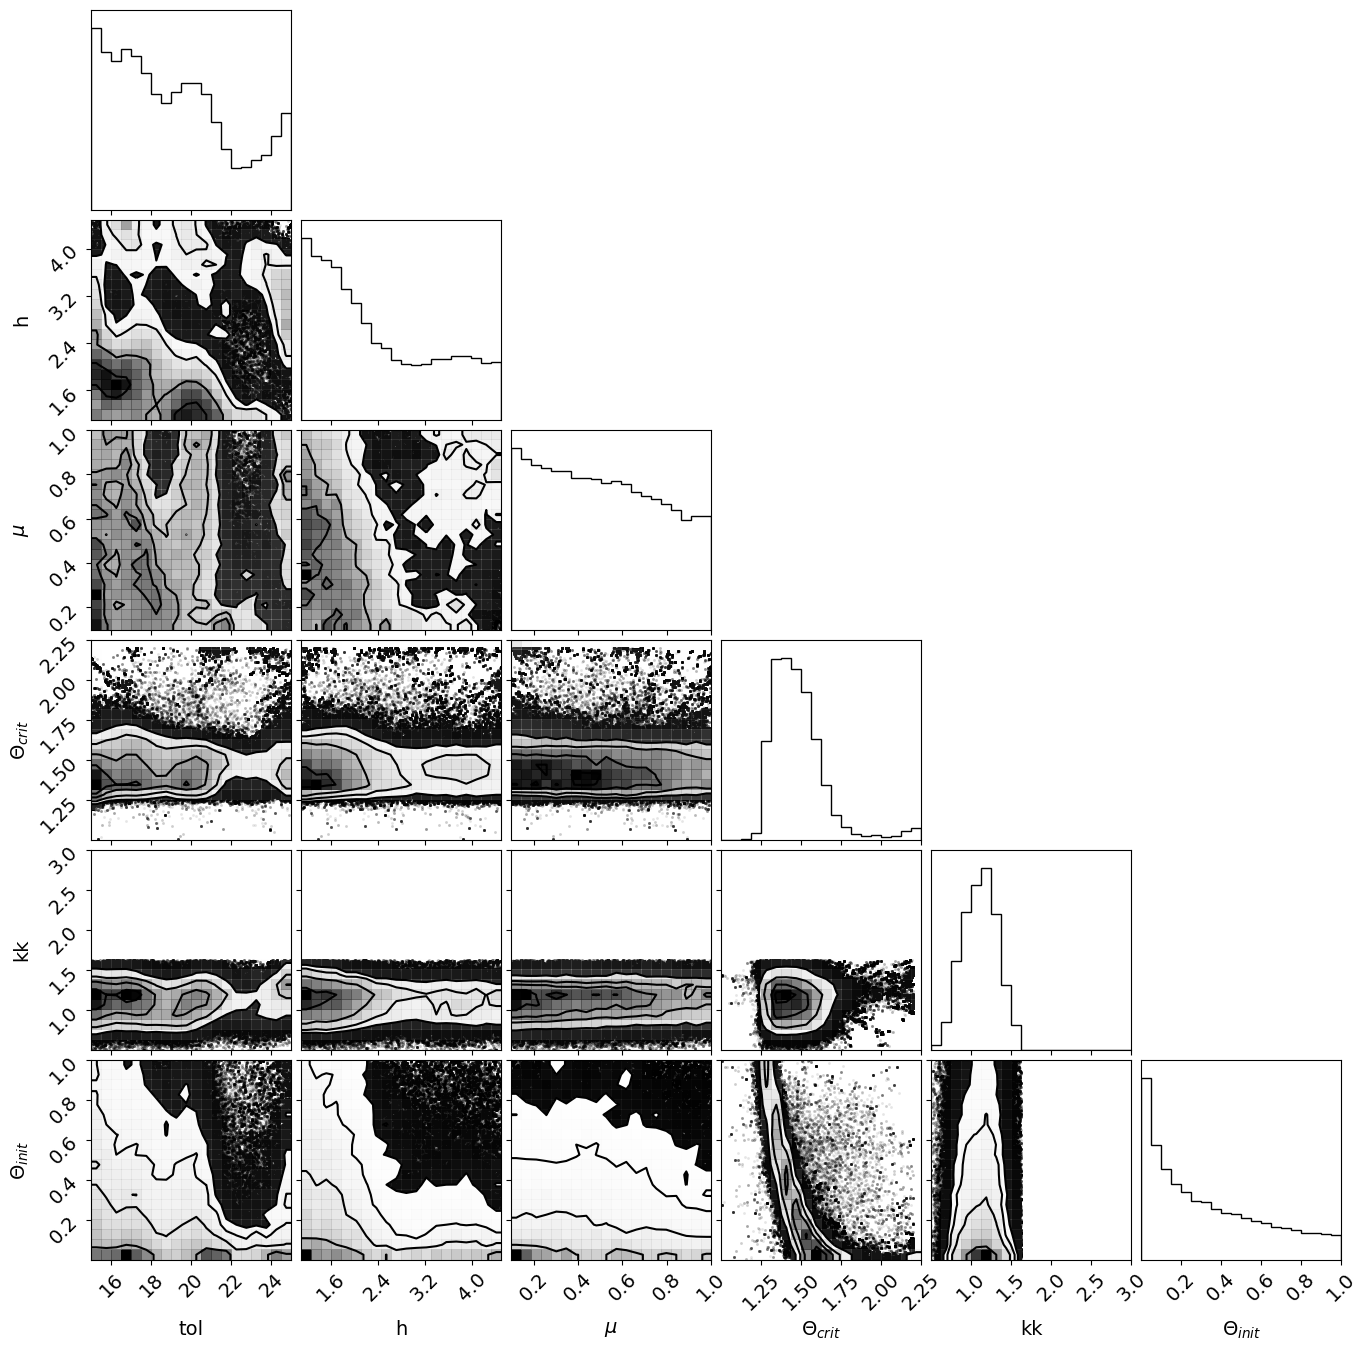

In [107]:
ranges = [(15, 25), (1.1, 4.5), (0.1, 1.0), (1.0, 2.25), (0.5, 3.0), (0.0, 1.0)]
# Create a pair plot
fig = corner.corner(pair_plot_samples, labels=["tol", "h", "$\mu$", "$\Theta_{{crit}}$", "kk", "$\Theta_{{init}}$"],
                    truths=[None, None, None, None, None, None], range=ranges)

# Show the plot
plt.show()

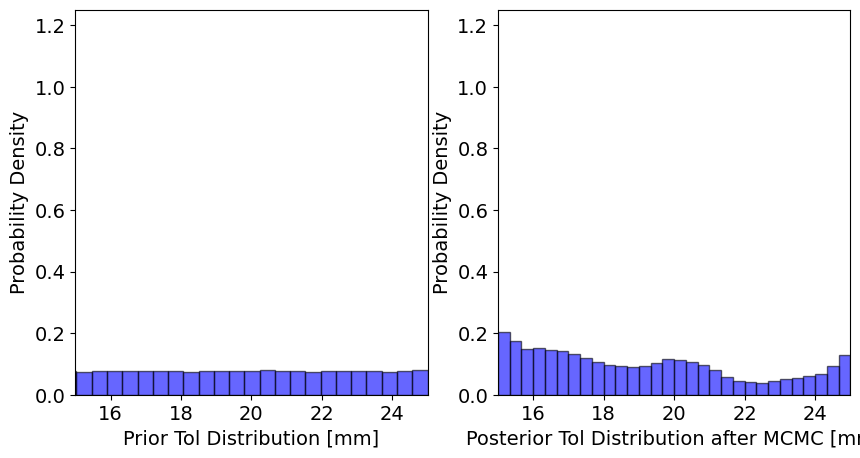

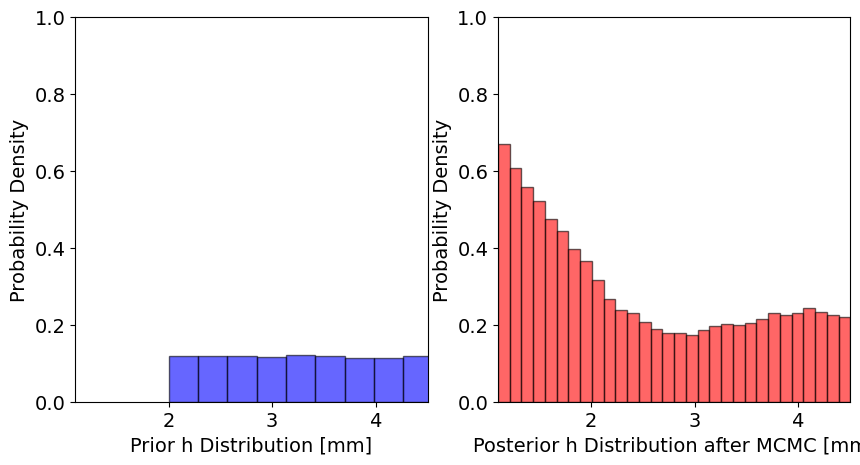

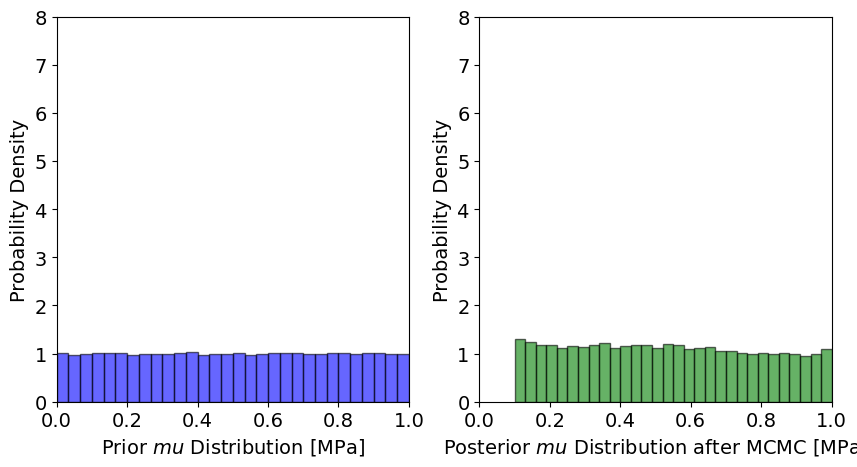

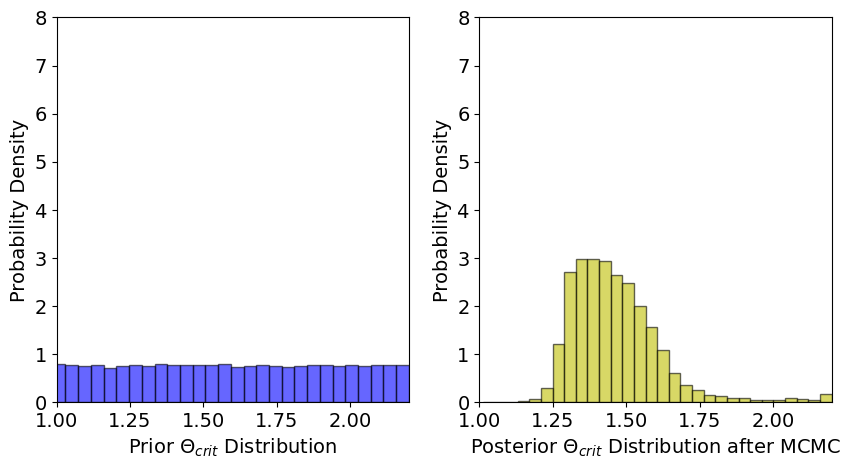

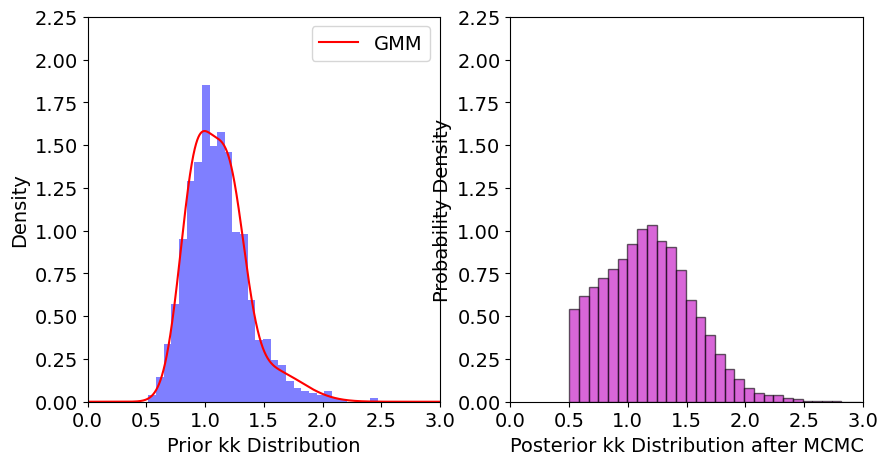

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


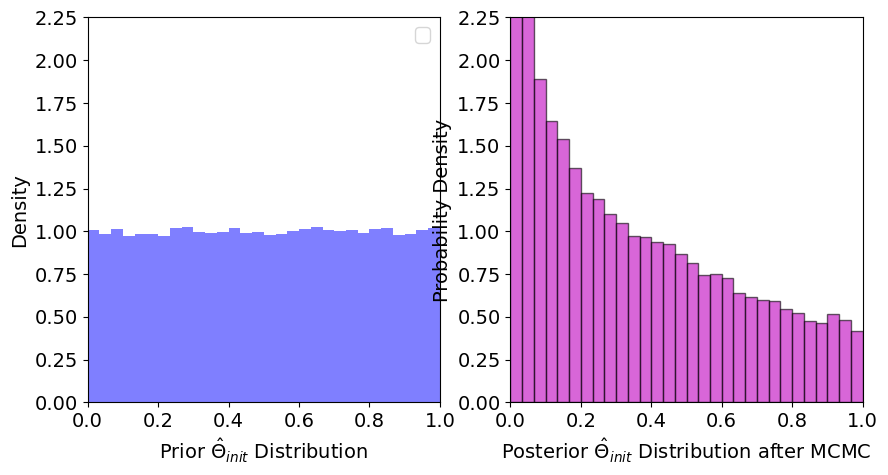

In [39]:
import matplotlib.pyplot as plt

# Extract samples for each input variable
posterior_tol = samples[:, 0]  # Samples for the first input variable
posterior_h = samples[:, 1]  # Samples for the second input variable
posterior_mu = samples[:, 2]  # Samples for the third input variable
posterior_theta_crit = samples[:, 3]  # Samples for the fourth input variable
posterior_kk = samples[:, 4]  # Samples for the fifth input variable
posterior_theta_init_hat = samples[:, 5] 
# Plot histograms of the samples

tol_uniform_samples = np.random.uniform(low=12, high=25, size=100000)
h_uniform_samples = np.random.uniform(low=2, high=10.5, size=100000)
mu_uniform_samples = np.random.uniform(low=0.0, high=1.0, size=100000)
#Theta_Crit_lognormal_samples = np.log(np.random.lognormal(mean=mean, sigma=sigma, size=100000))
Theta_Crit_lognormal_samples = np.random.uniform(low=0.9, high=2.2, size=100000)
Theta_init_hat_samples = np.random.uniform(low=0.0, high=1.0, size=100000)


#Plot Tol Prior and Posterior Distributions
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(tol_uniform_samples, bins=30, density=True, color='blue', alpha=0.6, edgecolor='black')
axs[0].set_xlabel('Prior Tol Distribution [mm]')
axs[0].set_ylabel('Probability Density')
axs[0].set_xlim([15, 25])
axs[0].set_ylim([0, 1.25])

axs[1].hist(posterior_tol, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
axs[1].set_xlabel('Posterior Tol Distribution after MCMC [mm]')
axs[1].set_ylabel('Probability Density')
axs[1].set_xlim([15, 25])
axs[1].set_ylim([0, 1.25])
plt.show()

#Plot h Prior and Posterior Distributions
fig2, axs2 = plt.subplots(1, 2, figsize=(10, 5))
axs2[0].hist(h_uniform_samples, bins=30, density=True, color='blue', alpha=0.6, edgecolor='black')
axs2[0].set_xlabel('Prior h Distribution [mm]')
axs2[0].set_ylabel('Probability Density')
axs2[0].set_xlim([1.1, 4.5])
axs2[0].set_ylim([0, 1])


axs2[1].hist(posterior_h, bins=30, density=True, alpha=0.6, color='r', edgecolor='black')
axs2[1].set_xlabel('Posterior h Distribution after MCMC [mm]')
axs2[1].set_ylabel('Probability Density')
axs2[1].set_xlim([1.1, 4.5])
axs2[1].set_ylim([0, 1])

#Plot mu Prior and Posterior Distributions
fig3, axs3 = plt.subplots(1, 2, figsize=(10, 5))
axs3[0].hist(mu_uniform_samples, bins=30, density=True, color='blue', alpha=0.6, edgecolor='black')
axs3[0].set_xlabel('Prior $mu$ Distribution [MPa]')
axs3[0].set_ylabel('Probability Density')
axs3[0].set_xlim([0, 1])
axs3[0].set_ylim([0, 8])

axs3[1].hist(posterior_mu, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
axs3[1].set_xlabel('Posterior $mu$ Distribution after MCMC [MPa]')
axs3[1].set_ylabel('Probability Density')
axs3[1].set_xlim([0, 1])
axs3[1].set_ylim([0, 8])

#Plot Theta Crit Prior and Posterior Distributions
fig4, axs4 = plt.subplots(1, 2, figsize=(10, 5))
axs4[0].hist(Theta_Crit_lognormal_samples, bins=30, density=True, color='blue', alpha=0.6, edgecolor='black')
axs4[0].set_xlabel('Prior $\Theta_{{crit}}$ Distribution')
axs4[0].set_ylabel('Probability Density')
axs4[0].set_xlim([1.0, 2.2])
axs4[0].set_ylim([0, 8])


axs4[1].hist(posterior_theta_crit, bins=30, density=True, alpha=0.6, color='y', edgecolor='black')
axs4[1].set_xlabel('Posterior $\Theta_{{crit}}$ Distribution after MCMC')
axs4[1].set_ylabel('Probability Density')
axs4[1].set_xlim([1.0, 2.2])
axs4[1].set_ylim([0, 8])
plt.show()


fig5, axs5 = plt.subplots(1, 2, figsize=(10, 5))
x = np.linspace(0, 3, 10000)
density = gmm.pdf(x)
axs5[0].hist(data, bins=30, density=True, alpha=0.5, color='blue')
axs5[0].plot(x, density, color='red', label='GMM')
axs5[0].set_xlim([0,3])
axs5[0].set_ylim([0, 2.25])
axs5[0].set_xlabel('Prior kk Distribution')
axs5[0].set_ylabel('Density')
axs5[0].legend()

axs5[1].hist(posterior_kk, bins=30, density=True, alpha=0.6, color='m', edgecolor='black')
axs5[1].set_xlim([0,3])
axs5[1].set_ylim([0, 2.25])
axs5[1].set_xlabel('Posterior kk Distribution after MCMC')
axs5[1].set_ylabel('Probability Density')

plt.show()


fig6, axs6 = plt.subplots(1, 2, figsize=(10, 5))
axs6[0].hist(Theta_init_hat_samples, bins=30, density=True, alpha=0.5, color='blue')
axs6[0].set_xlim([0, 1.0])
axs6[0].set_ylim([0, 2.25])
axs6[0].set_xlabel('Prior $\hat{\Theta}_{{init}}$ Distribution')
axs6[0].set_ylabel('Density')
axs6[0].legend()

axs6[1].hist(posterior_theta_init_hat, bins=30, density=True, alpha=0.6, color='m', edgecolor='black')
axs6[1].set_xlim([0, 1.0])
axs6[1].set_ylim([0, 2.25])
axs6[1].set_xlabel('Posterior $\hat{\Theta}_{{init}}$ Distribution after MCMC')
axs6[1].set_ylabel('Probability Density')

plt.show()

In [26]:
import numpy as np
sigma_2 = 0.2

In [27]:
(1/(sigma_2*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((1)**2)/(sigma_2**2)))*np.exp(sigma_2**2)

7.736968445687695e-06

In [28]:
print(np.shape(samples))

(1000000, 5)


In [29]:
print(np.mean(samples[:,3]))

1.472940082105213


In [30]:
sigma_1 = 5000
sigma_2 = 2
y = 4018
y_pred = 3750
err_pred = 1.75
likelihood = (1/(sigma_1*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((y - y_pred)**2)/(sigma_1**2)))
print(likelihood)

7.967392384022696e-05


In [ ]:
log_posterior_values = []
# Calculate the log-posterior for each multivariate sample
for i in range(len(samples)):
    log_posterior_value = log_posterior(samples[i, :], y_observed, f, samples[i, 5])
    log_posterior_values.append(log_posterior_value)
    
# Find the index of the sample with the maximum log-posterior value
map_index = np.argmax(log_posterior_values)

# The MAP estimate is the sample with the highest log-posterior
map_estimate = samples[map_index]

print("MAP estimate:", map_estimate)

In [ ]:
theta_init = 1 + (1.2475664 - 1) * 0.92013098
gp_1.predict(np.array([24.76091621, 3.45854183, 0.96456588, 1.2475664, 0.99766267]).reshape(1,-1))/theta_init

In [ ]:
output_samples = []
n_samples = samples[:, 0:3].shape[0]
print(n_samples)
for i in range(n_samples):
    theta_init = 1 + (samples[:, 3] - 1) * samples[:,5]
    output_samples.append(gp_1.predict(samples[i, :-1].reshape(1, -1))/theta_init)

230000


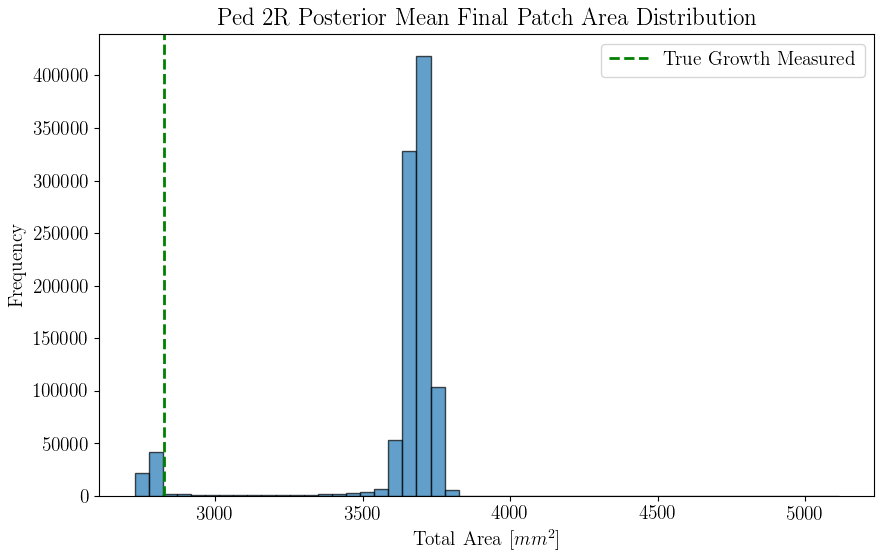

In [57]:
# Plot histogram
flat_samples = np.concatenate(output_samples)
plt.figure(figsize=(10, 6))
plt.hist(flat_samples, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(x=2827.281, color='green', linestyle='--', linewidth=2, label="True Growth Measured")

# Add labels and title
plt.title('Ped 2R Posterior Mean Final Patch Area Distribution')
plt.legend()
plt.xlabel('Total Area [$mm^2$]')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [47]:
print(np.mean(output_samples))
print(np.median(output_samples))
print(np.std(output_samples))

3738.0942315166412
3798.0430672634393
246.41265605159268


In [60]:
output_samples_error = []
n_samples = samples[:, 0:3].shape[0]
print(n_samples)
for i in range(n_samples):
    output_samples_error.append(gp_2.predict(samples[i, :-1].reshape(1, -1)))

1000000


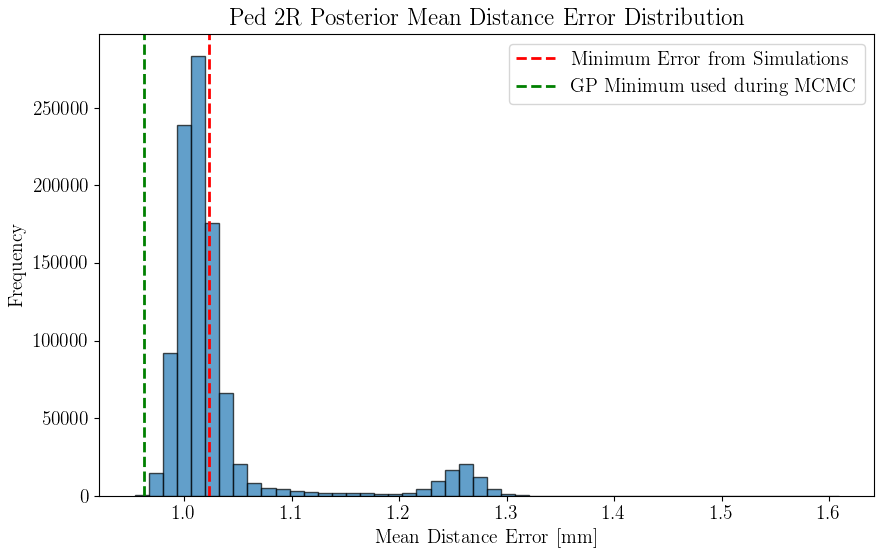

In [65]:
# Plot histogram
flat_samples_error = np.concatenate(output_samples_error)
plt.figure(figsize=(10, 6))
plt.hist(flat_samples_error, bins=50, edgecolor='black', alpha=0.7)
# Draw a dotted vertical line at x=2
plt.axvline(x=1.02284, color='red', linestyle='--', linewidth=2, label="Minimum Error from Simulations")
plt.axvline(x=0.96280060072786, color='green', linestyle='--', linewidth=2, label="GP Minimum used during MCMC")

# Add labels and title
plt.title('Ped 2R Posterior Mean Distance Error Distribution')
plt.legend()
plt.xlabel('Mean Distance Error [mm]')
plt.ylabel('Frequency')

# Show plot
plt.show()

16


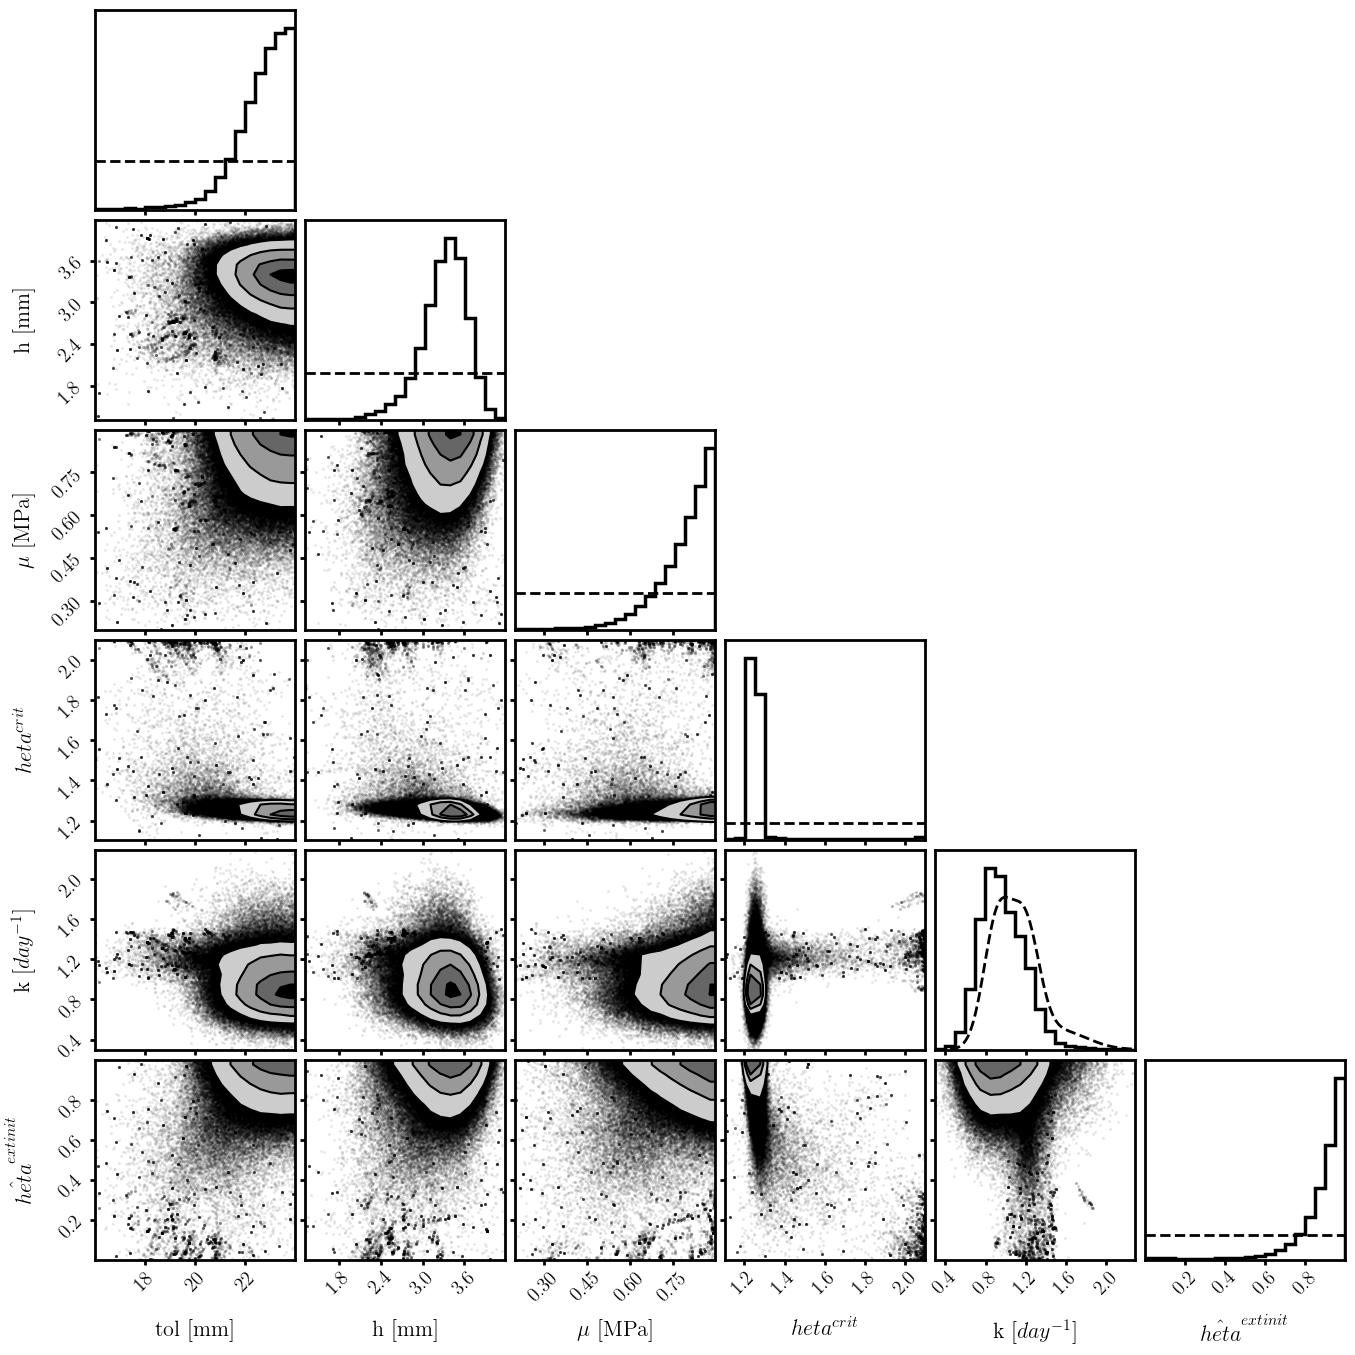

In [27]:
posterior_samples = samples

fig = corner.corner(posterior_samples, color= 'k', 
                    labels=["tol [mm]", "h [mm]", "$\mu$ [MPa]", "$\theta^{{crit}}$", "k [$day^{-1}$]", "$\hat{\theta}^{\text{init}}$"], 
                    title_kwargs={"fontsize": 12}, fill_contours=True, 
                    label_kwargs={"fontsize": 38, "fontweight": "bold"}, 
                    hist_kwargs={'density': True, 'linewidth': 2.5})

# Define the prior distributions (this is just an example using normal distributions)
priors = [prior for prior in prior_distributions]

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=14)  # Adjust the size as needed
font_properties = {'weight': 'bold', 'size': 16}  # Adjust the size as needed
# Define the prior distributions (this is just an example using normal distributions)
priors = [prior for prior in prior_distributions]

# Extract the axes from the corner plot
axes = np.array(fig.axes).reshape((6, 6))

print(priors[0].kwds['loc'])
# Overlay the priors on the diagonal subplots
for i in range(6):
    ax = axes[i, i]
    x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 1000)
    

    y = priors[i].pdf(x)

    # Plot the uniform distribution
    ax.plot(x, y, color='k', linestyle='--', linewidth=2.0)
    
axes = np.array(fig.axes).reshape((6, 6))  # Reshape axes into a 3x3 grid
for ax_row in axes:
    for ax in ax_row:
        for spine in ax.spines.values():
            spine.set_linewidth(2)  # Set the linewidth of each subplot's border
            # Set font properties for labels and ticks


# Apply the font properties to all text elements in the plot
for ax in fig.get_axes():
    ax.set_xlabel(ax.get_xlabel(), fontdict=font_properties)
    ax.set_ylabel(ax.get_ylabel(), fontdict=font_properties)
    ax.tick_params(axis='both', which='major', labelsize=14, width=2)  # Adjust the size as needed
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontsize(14)  # Adjust the size as needed
        tick.set_fontweight('bold')

# Show the plot
plt.show()

In [29]:
print(np.median(samples[2000:, 3]))
print(np.mean(samples[2000:, 3]))

1.2538443083861734
1.2677240066026134


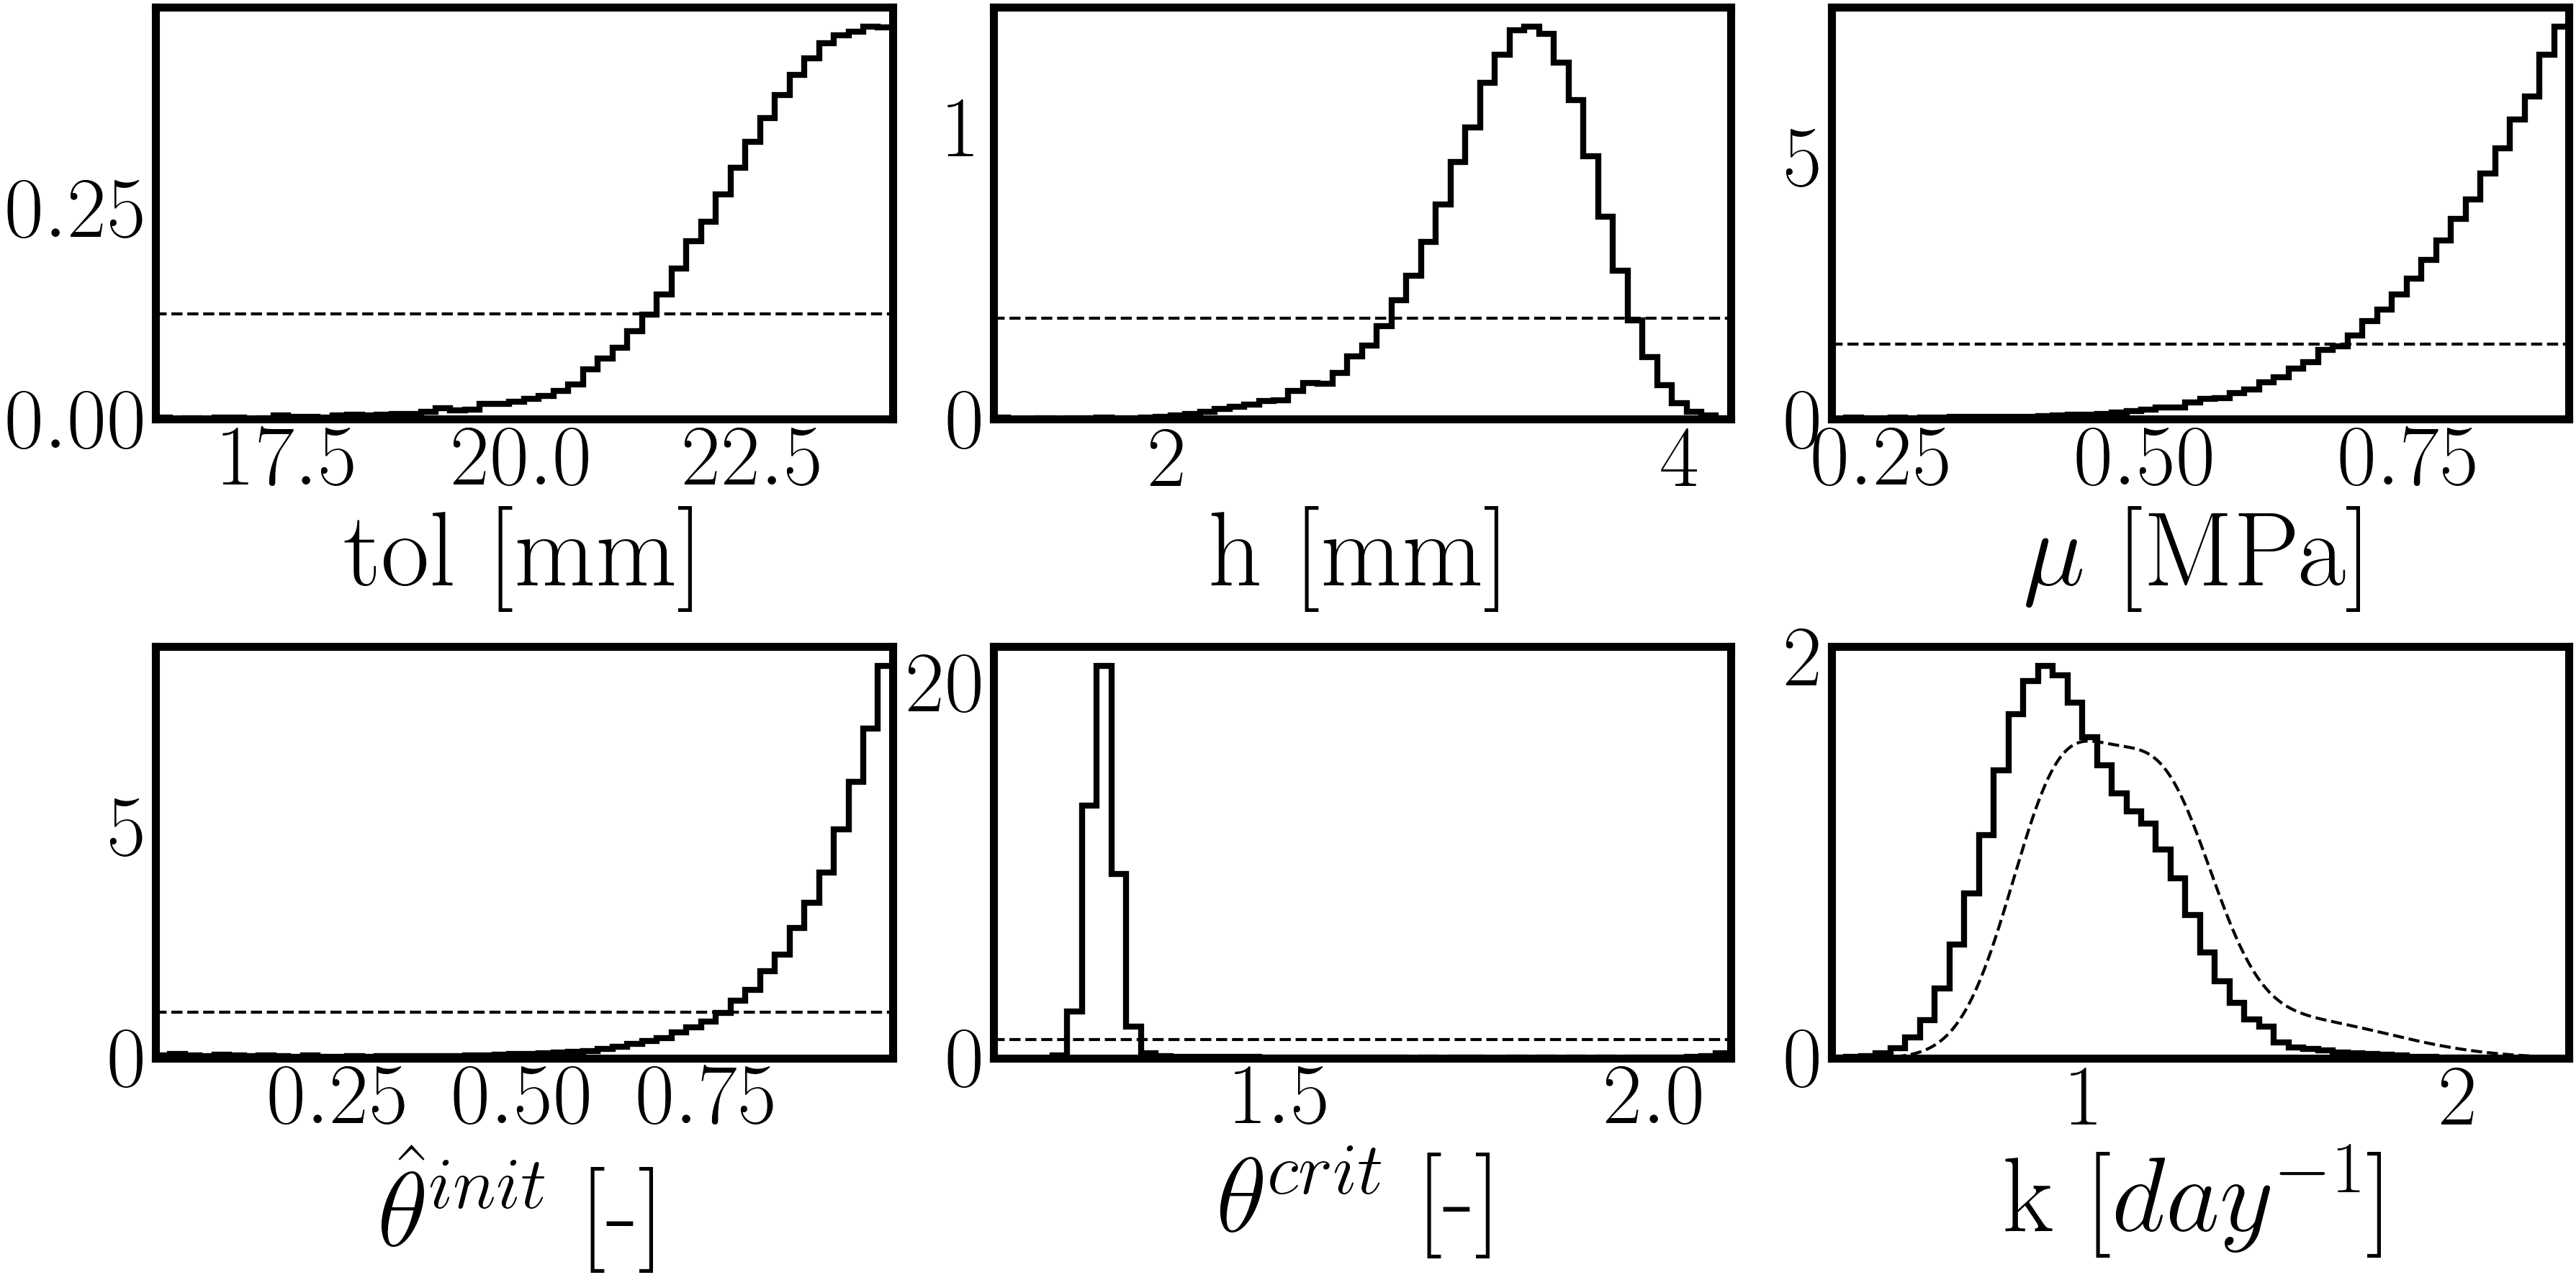

In [28]:
# Assuming posterior_samples and priors are already defined
posterior_samples = samples

# Define labels
labels=["tol [mm]", "h [mm]", "$\mu$ [MPa]", "$\\theta^{crit}$ [-]", "k [$day^{-1}$]", "$\hat{\\theta}^{init}$ [-]"]



# Set up font properties
label_font_properties = {'fontsize': 106, 'fontweight': 'bold'}  # Increase the font size
tick_font_properties = {'fontsize': 86, 'fontweight': 'bold'}  # Increase the font size for ticks

# Create a single figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(2, 3, figsize=(36, 18))  # Adjust the size as needed

# Manually assign the subplots to match the required order
plot_positions = {
    "tol [mm]": (0, 0),
    "h [mm]": (0, 1),
    "$\\mu$ [MPa]": (0, 2),
    "$\hat{\\theta}^{init}$ [-]": (1, 0),
    "$\\theta^{crit}$ [-]": (1, 1),
    "k [$day^{-1}$]": (1, 2)
}


# Loop through each parameter and create a subplot in the specified order
for i, label in enumerate(labels):
    row, col = plot_positions[label]
    ax = axes[row, col]

    # Plot the histogram of the posterior samples
    ax.hist(posterior_samples[:, i], bins=50, density=True, color='k', histtype='step', linewidth=6)

    # Define the x range for plotting the prior
    x_min, x_max = posterior_samples[:, i].min(), posterior_samples[:, i].max()
    x = np.linspace(x_min, x_max, 1000)

    # Calculate and plot the prior distribution
    y = priors[i].pdf(x)
    ax.plot(x, y, color='k', linestyle='--', linewidth=3.0)

    # Set the x limits to the data range
    ax.set_xlim(x_min, x_max)

    # Set the labels and title
    ax.set_xlabel(label, label_font_properties)


    # Set the linewidth of the plot border
    for spine in ax.spines.values():
        spine.set_linewidth(8)

    # Apply the font properties to the ticks
    ax.tick_params(axis='both', which='major', labelsize=tick_font_properties['fontsize'], width=2)  # Adjust the size as needed
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontsize(tick_font_properties['fontsize'])  # Adjust the size as needed
        tick.set_fontweight(tick_font_properties['fontweight'])

# Adjust layout for better spacing


plt.tight_layout()
# Save the figure with 200 dpi resolution
fig.savefig('Ped_2R_marginal_plots.png', dpi=200, bbox_inches='tight')
plt.show()
# Close the figure to free up memory
plt.close(fig)